# Introduction

In the [first part](https://www.kaggle.com/code/gustavofelici/sql-mining-for-features-to-predict-order-score) of this Data Science project, we used SQL to explore the "Brazilian E-Commerce Public Dataset by Olist" dataset and better understand how Olist's e-commerce platform works. Now, in the second part, our focus is on data manipulation and visualization.

In this step we will work with the data already explored in the first part of the project, where we identified some of the most relevant variables for customer satisfaction, such as the product category, the freight value and the delivery time.

We will clean and organize the data to make it easier to work with, and then create visualizations to better understand the relationships between the variables and how they can affect customer satisfaction.

Importantly, the first part of the project is essential for us to understand the context of the data and how it was collected. So if you have not yet checked out the first part, we recommend that you do so before proceeding with this step.

We will explore the data and create visualizations to better understand the relationships between the variables, and thus prepare the data for the third and final stage of the project, where we will predict customer satisfaction based on the review score.

# Libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
sns.set_theme(style="darkgrid", palette="viridis")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Olist/Output/Olist_features_V2.csv')

# Checking Data

In [ ]:
df.head()

,Unnamed: 0,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_max,payment_type_min,...,product_length_cm_sum,product_length_cm_mean,product_height_cm_sum,product_height_cm_mean,product_width_cm_sum,product_width_cm_mean,same_city_mean,same_state_mean,distance_km_sum,distance_km_mean
0,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,credit_card,...,19.0,19.0,8.0,8.0,13.0,13.0,0.0,1.0,18.570990,18.570990
1,1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,19.0,19.0,13.0,13.0,19.0,19.0,0.0,0.0,5113.110392,5113.110392
2,2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,24.0,24.0,19.0,19.0,21.0,21.0,0.0,0.0,512.137497,512.137497
3,3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,...,30.0,30.0,10.0,10.0,20.0,20.0,0.0,0.0,1815.967479,1815.967479
4,4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,...,51.0,51.0,15.0,15.0,15.0,15.0,0.0,1.0,29.685539,29.685539


In [ ]:
df = df.drop(['Unnamed: 0', 'order_status', 'order_id'], axis=1)

In [ ]:
df.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential_max,payment_type_min,payment_type_max,payment_type_nunique,payment_installments_max,...,product_length_cm_sum,product_length_cm_mean,product_height_cm_sum,product_height_cm_mean,product_width_cm_sum,product_width_cm_mean,same_city_mean,same_state_mean,distance_km_sum,distance_km_mean
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,credit_card,voucher,2.0,1.0,...,19.0,19.0,8.0,8.0,13.0,13.0,0.0,1.0,18.570990,18.570990
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,boleto,1.0,1.0,...,19.0,19.0,13.0,13.0,19.0,19.0,0.0,0.0,5113.110392,5113.110392
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,credit_card,1.0,3.0,...,24.0,24.0,19.0,19.0,21.0,21.0,0.0,0.0,512.137497,512.137497
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,credit_card,1.0,1.0,...,30.0,30.0,10.0,10.0,20.0,20.0,0.0,0.0,1815.967479,1815.967479
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,credit_card,1.0,1.0,...,51.0,51.0,15.0,15.0,15.0,15.0,0.0,1.0,29.685539,29.685539


In [ ]:
df.shape

(94490, 39)

# Exploratory Data Analysis

## Univariate

### Duplicates

In [ ]:
df.duplicated().sum()

0

### Missing Values

In [ ]:
df.isna().sum()

order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
payment_sequential_max             0
payment_type_min                   0
payment_type_max                   0
payment_type_nunique               0
payment_installments_max           0
payment_value_nunique              0
payment_value_mean                 0
score                              0
order_item_id_nunique              0
seller_id_nunique                  0
product_id_nunique                 0
shipping_limit_date_max            0
price_nunique                      0
price_mean                         0
freight_value_mean                 0
product_category_name_nunique      0
product_name_lenght_sum            0
product_name_lenght_mean           0
product_description_lenght_sum     0
product_description_lenght_mean    0
product_photos_qty_sum             0
product_photos_qty_mean            0
p

### Data Types

In [ ]:
df.dtypes

order_purchase_timestamp            object
order_approved_at                   object
order_delivered_carrier_date        object
order_delivered_customer_date       object
order_estimated_delivery_date       object
payment_sequential_max             float64
payment_type_min                    object
payment_type_max                    object
payment_type_nunique               float64
payment_installments_max           float64
payment_value_nunique              float64
payment_value_mean                 float64
score                              float64
order_item_id_nunique              float64
seller_id_nunique                  float64
product_id_nunique                 float64
shipping_limit_date_max             object
price_nunique                      float64
price_mean                         float64
freight_value_mean                 float64
product_category_name_nunique        int64
product_name_lenght_sum            float64
product_name_lenght_mean           float64
product_des

Dates is objects

### Distribution

In [ ]:
pd.concat([df.score.value_counts(), (df.score.value_counts(normalize=True) * 100)], axis=1)

,score,score
5.0,56047,59.315271
4.0,18612,19.697322
1.0,9145,9.678273
3.0,7816,8.271775
2.0,2870,3.037358


### Feature Types

#### Target

In [ ]:
target = ['score']

#### Data
We will work with features soon, for now we will not focus on it because it will involve feature engineering 

In [ ]:
date_vars = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date', 
    'shipping_limit_date_max'
    ]

#### Categorical

Removing Date features remains

In [ ]:
categorical_vars = [
    'payment_type_min', 
    'payment_type_max'
    ]

#### Continuous

In [ ]:
continuous_vars = list(df.drop(target, axis=1).select_dtypes(exclude=['object']).columns)
continuous_vars

['payment_sequential_max',
 'payment_type_nunique',
 'payment_installments_max',
 'payment_value_nunique',
 'payment_value_mean',
 'order_item_id_nunique',
 'seller_id_nunique',
 'product_id_nunique',
 'price_nunique',
 'price_mean',
 'freight_value_mean',
 'product_category_name_nunique',
 'product_name_lenght_sum',
 'product_name_lenght_mean',
 'product_description_lenght_sum',
 'product_description_lenght_mean',
 'product_photos_qty_sum',
 'product_photos_qty_mean',
 'product_weight_g_sum',
 'product_weight_g_mean',
 'product_length_cm_sum',
 'product_length_cm_mean',
 'product_height_cm_sum',
 'product_height_cm_mean',
 'product_width_cm_sum',
 'product_width_cm_mean',
 'same_city_mean',
 'same_state_mean',
 'distance_km_sum',
 'distance_km_mean']

### Distribution

#### Target

<Axes: xlabel='score', ylabel='count'>

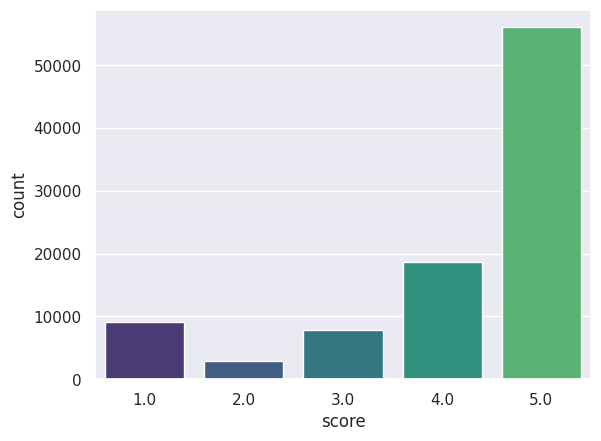

In [ ]:
sns.countplot(data=df, x='score')

In [ ]:
dist_df = pd.concat([df.score.value_counts(), round(df.score.value_counts(normalize=True) * 100, 2)], axis=1)
dist_df.columns = ['count', 'percent']
dist_df

,count,percent
5.0,56047,59.32
4.0,18612,19.70
1.0,9145,9.68
3.0,7816,8.27
2.0,2870,3.04


#### All features values

In [ ]:
def resume(df):
  count_values = pd.DataFrame()

  for col in df.drop('score', axis=1).columns:
    new_row = {
        'column': col,
        'dtype': df[col].dtypes,
        'count': len(df[col].unique()),
        'max_normalize': round(df[col].value_counts(normalize=True).max() * 100, 2),
        'values': df[col].unique(),
        'normalize': round(df[col].value_counts(normalize=True) * 100, 2).to_list()
    }
    count_values = pd.concat([count_values, pd.Series(new_row)], axis=1)

  return count_values.transpose().sort_values(by='count')

In [ ]:
count_values = resume(df)
count_values

,column,dtype,count,max_normalize,values,normalize
0,payment_type_nunique,float64,2,97.74,"[2.0, 1.0]","[97.74, 2.26]"
0,product_category_name_nunique,int64,3,99.24,"[1, 2, 3]","[99.24, 0.75, 0.02]"
0,payment_type_max,object,4,74.77,"[voucher, boleto, credit_card, debit_card]","[74.77, 19.89, 3.8, 1.54]"
0,payment_type_min,object,4,77.02,"[credit_card, boleto, debit_card, voucher]","[77.02, 19.89, 1.55, 1.54]"
0,seller_id_nunique,float64,5,98.67,"[1.0, 2.0, 3.0, 4.0, 5.0]","[98.67, 1.27, 0.06, 0.0, 0.0]"
0,price_nunique,float64,7,97.52,"[1.0, 2.0, 3.0, 5.0, 4.0, 6.0, 7.0]","[97.52, 2.29, 0.16, 0.02, 0.0, 0.0, 0.0]"
0,product_id_nunique,float64,8,96.66,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]","[96.66, 2.93, 0.31, 0.07, 0.01, 0.01, 0.0, 0.0]"
0,same_city_mean,float64,10,94.84,"[0.0, 1.0, 0.5, 0.8333333333333334, 0.75, 0.66...","[94.84, 5.09, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
0,same_state_mean,float64,12,63.89,"[1.0, 0.0, 0.8333333333333334, 0.5, 0.33333333...","[63.89, 35.85, 0.19, 0.02, 0.02, 0.01, 0.0, 0...."
0,payment_value_nunique,float64,15,97.04,"[3.0, 1.0, 2.0, 5.0, 7.0, 6.0, 4.0, 19.0, 10.0...","[97.04, 2.54, 0.28, 0.07, 0.02, 0.01, 0.01, 0...."


#### Categorical

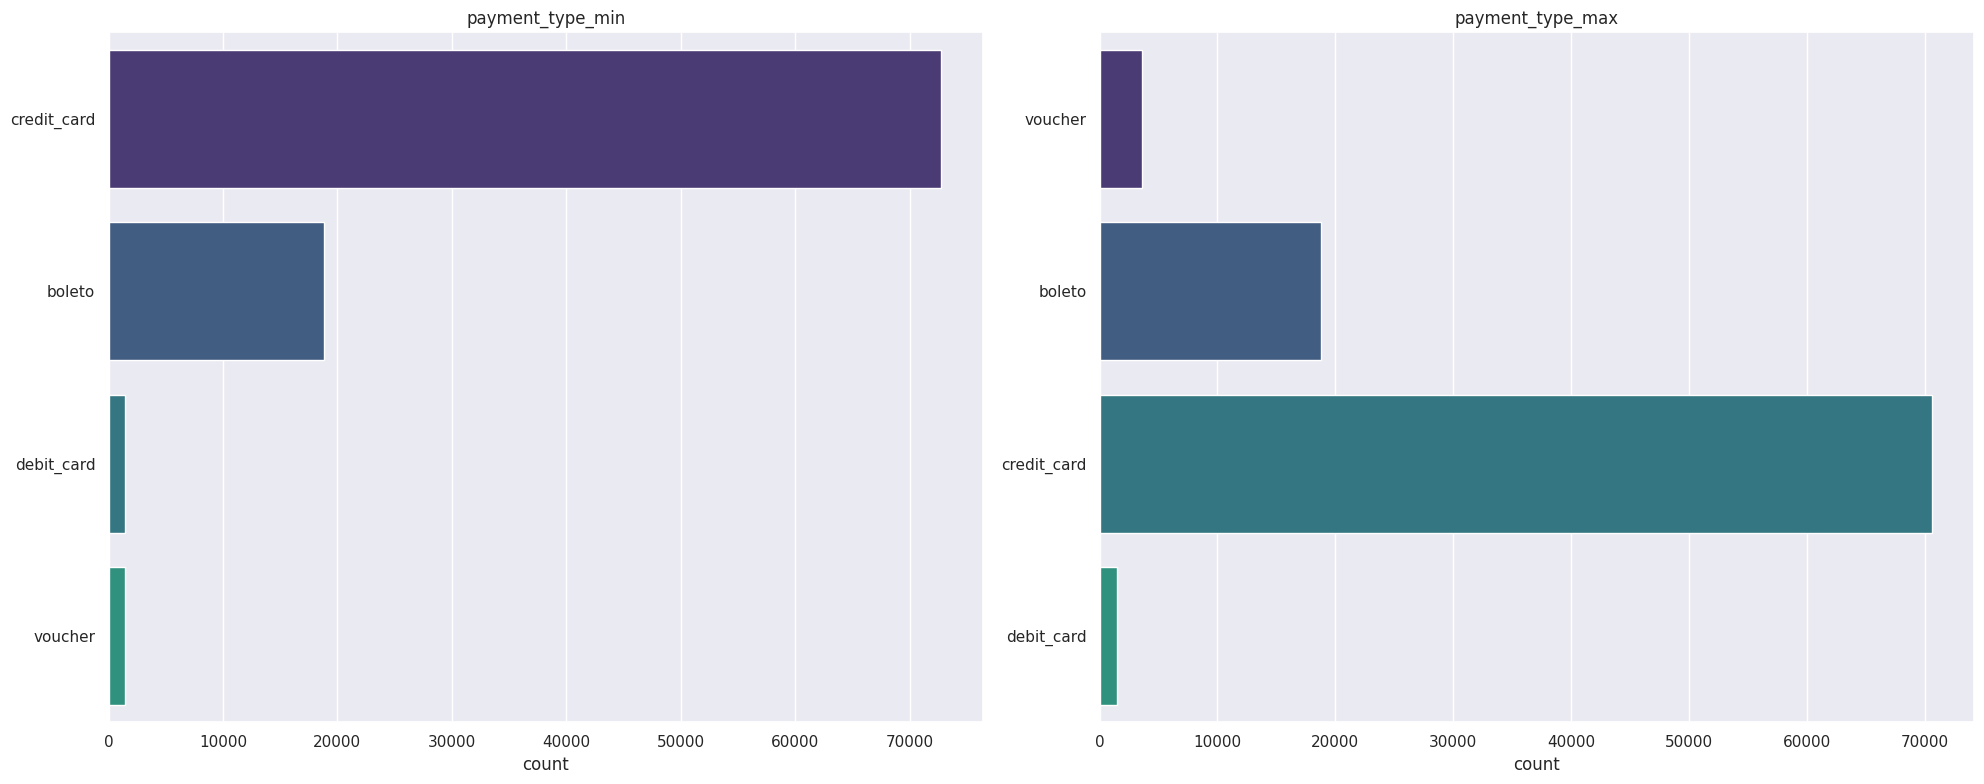

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(20,8))
axs = axs.ravel()

for i, col in enumerate(categorical_vars):
  sns.countplot(
      data=df,
      y=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)
  
plt.tight_layout()

Where is cases will `payment_type_min` is different to `payment_type_max` ? 

In [ ]:
pd.crosstab(df['payment_type_min'], df['payment_type_max'])

payment_type_max,boleto,credit_card,debit_card,voucher
payment_type_min,,,,
boleto,18798,0,0,0
credit_card,0,70646,0,2131
debit_card,0,0,1451,0
voucher,0,0,0,1464


Just in first payment(`payment_type_min`) in credit card can be changed to voucher

Probably, We be create a column with `payment_type_min` is different to `payment_type_max` in feature engineering

#### Continuous

In [ ]:
#ordened values by value_counts
continuous_vars = list(count_values[ (count_values['dtype'] == 'int64') | (count_values['dtype'] == 'float64')  ].column)

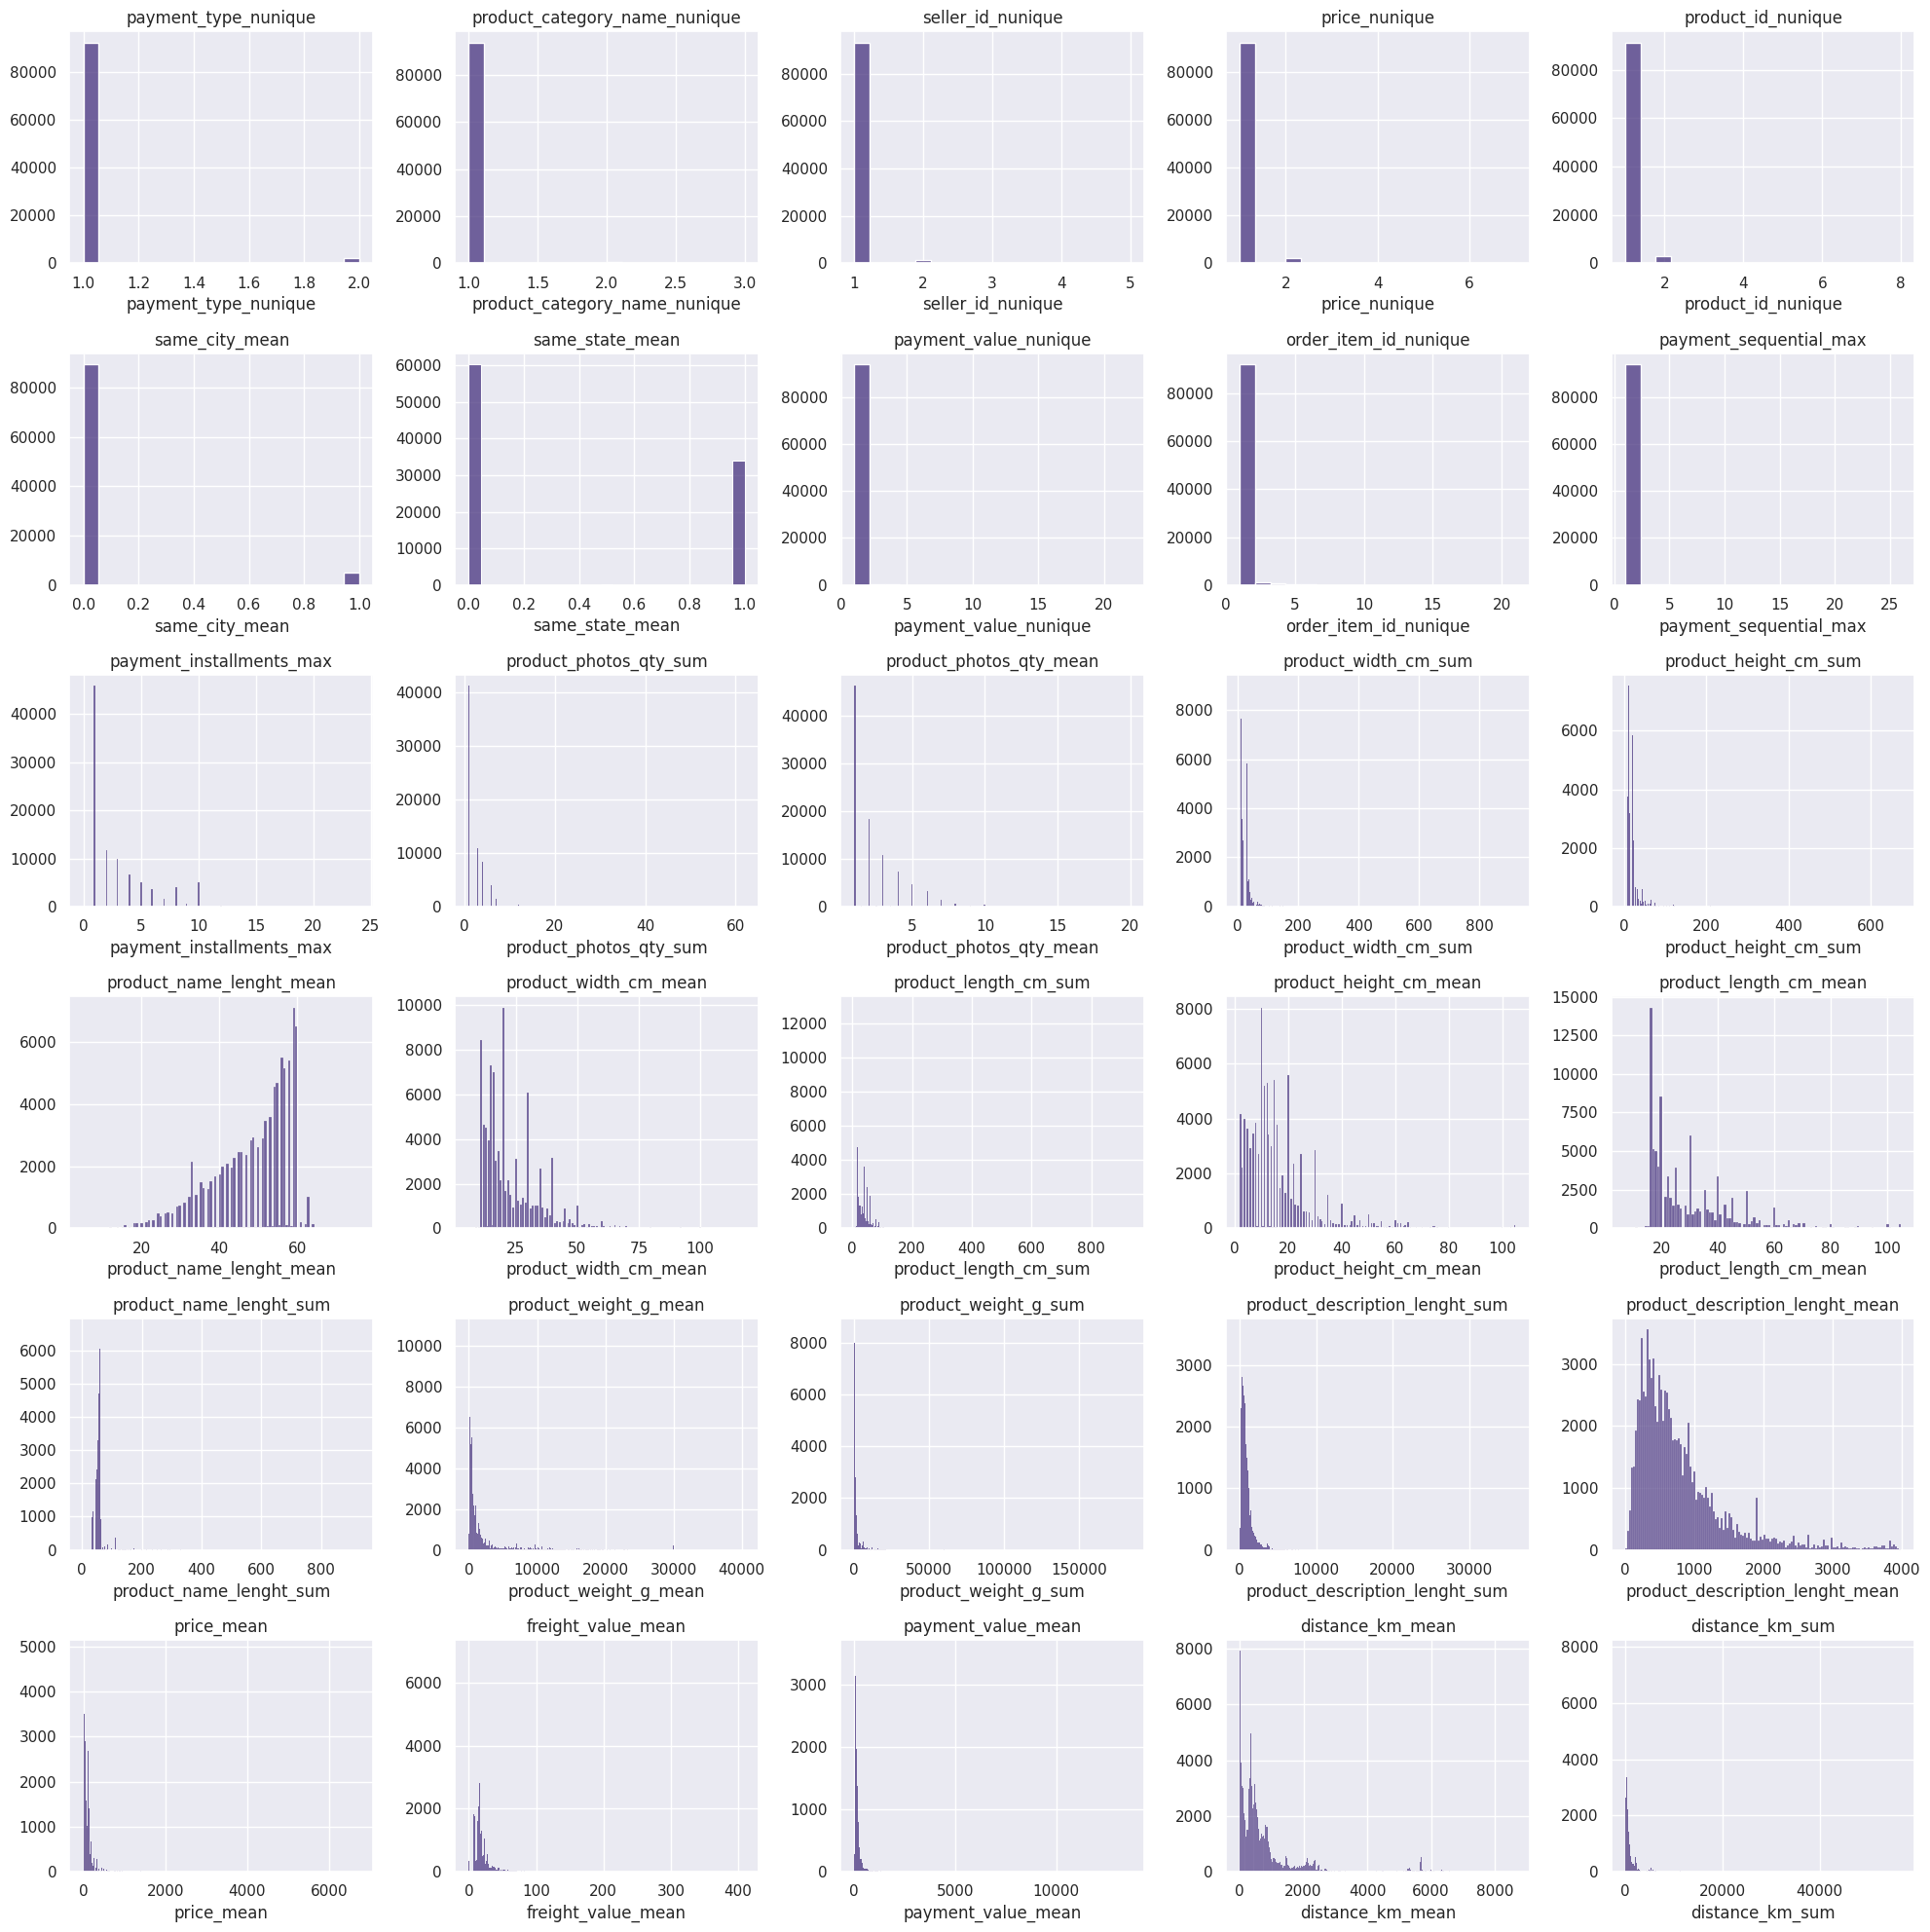

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(20,20))
axs = axs.ravel()

for i, col in enumerate(continuous_vars):
  sns.histplot(
      data=df,
      x=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

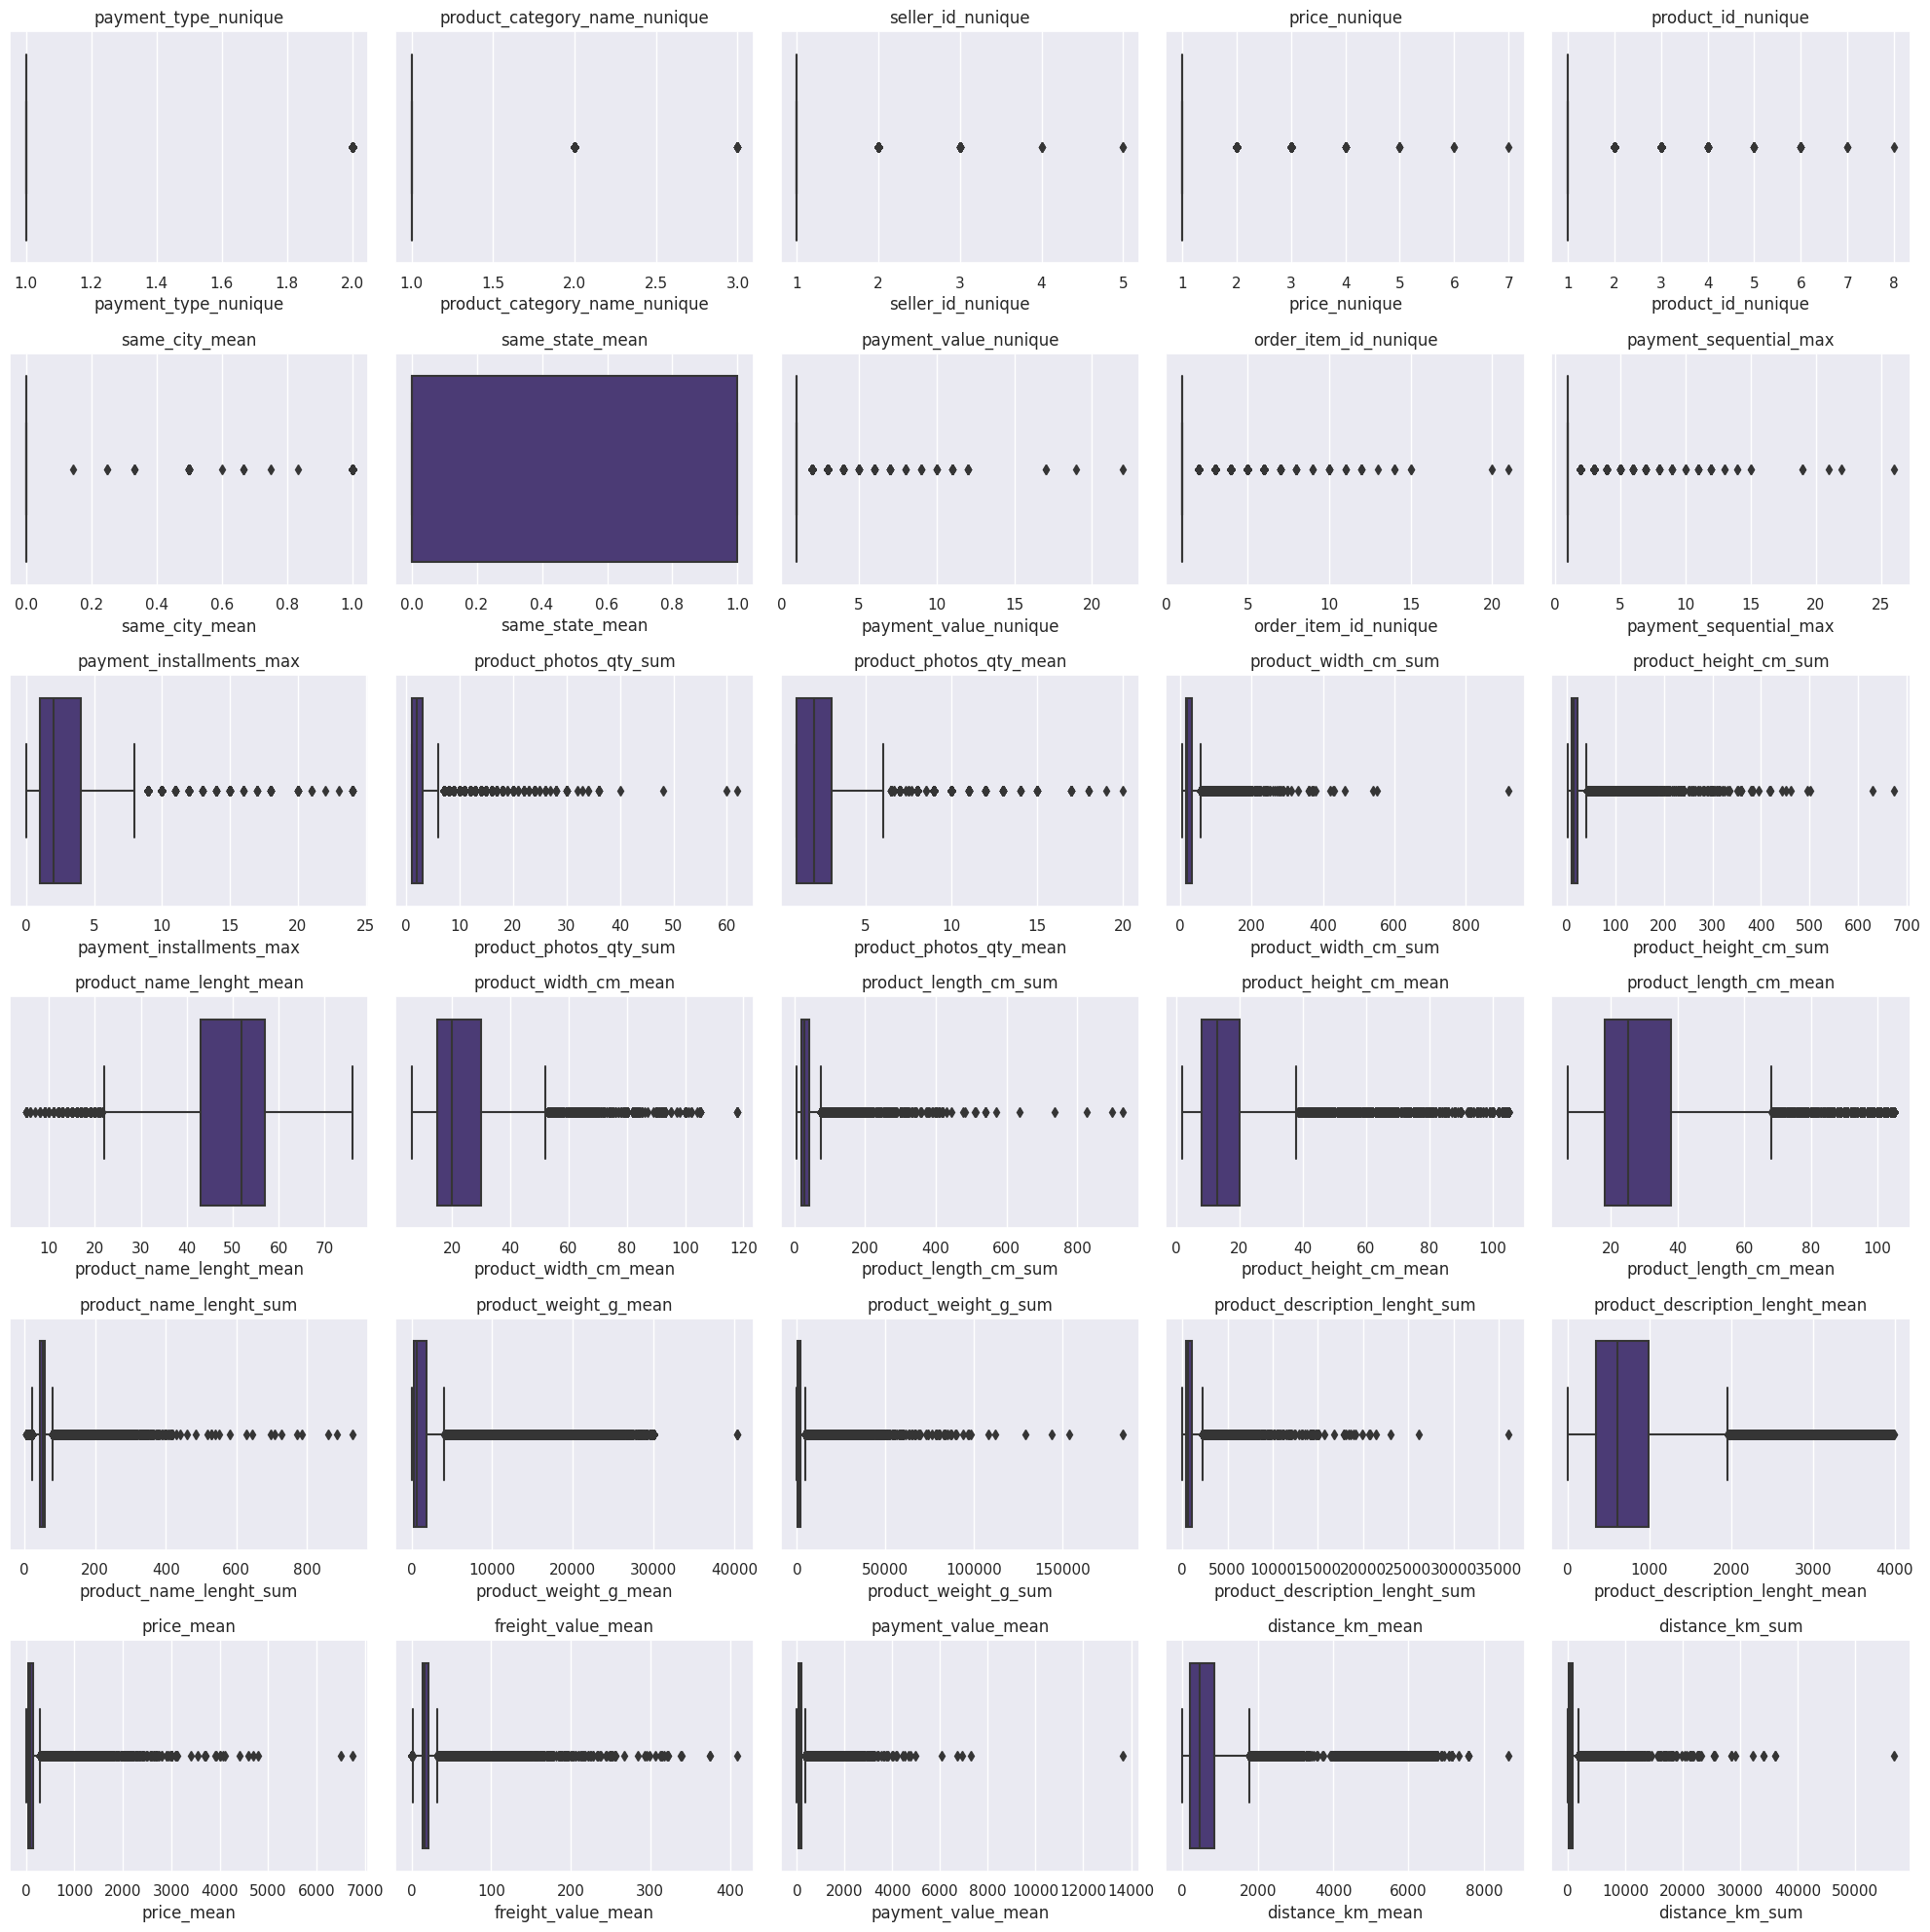

In [ ]:
fig, axs = plt.subplots(6, 5, figsize=(20,20))
axs = axs.ravel()

for i, col in enumerate(continuous_vars):
  sns.boxplot(
      data=df,
      x=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

some skewed variables, 
  `payment_type_nunique`
  `product_category_name_nunique`
  `seller_id_nunique`...
this variable in max of count values probaly is more than 96%, i will remove this later.

Some Outliers too.  

#### Date

In [ ]:
from datetime import date

In [ ]:
for date in date_vars:
  df[date] = pd.to_datetime(df[date])

df[date_vars].dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
shipping_limit_date_max          datetime64[ns]
dtype: object

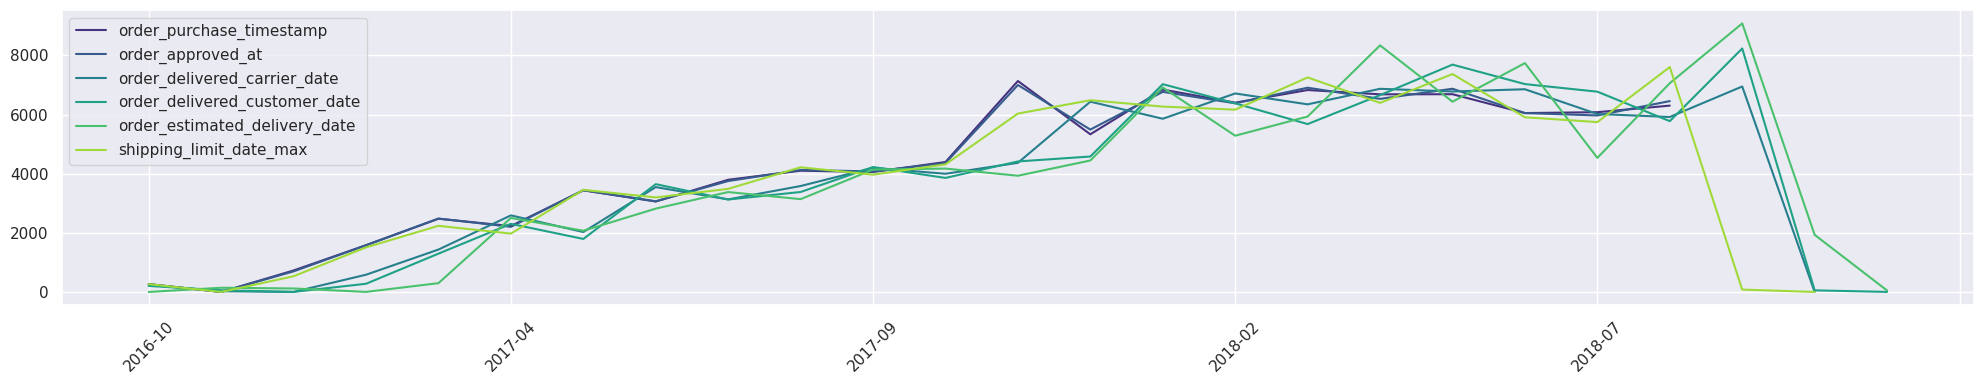

In [ ]:
plt.figure(figsize=(20,4))
for column in date_vars:
  year_month = df[column].dt.strftime('%Y-%m')
  year_month.value_counts().sort_index(ascending=True).plot(legend=column)

plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.tight_layout()

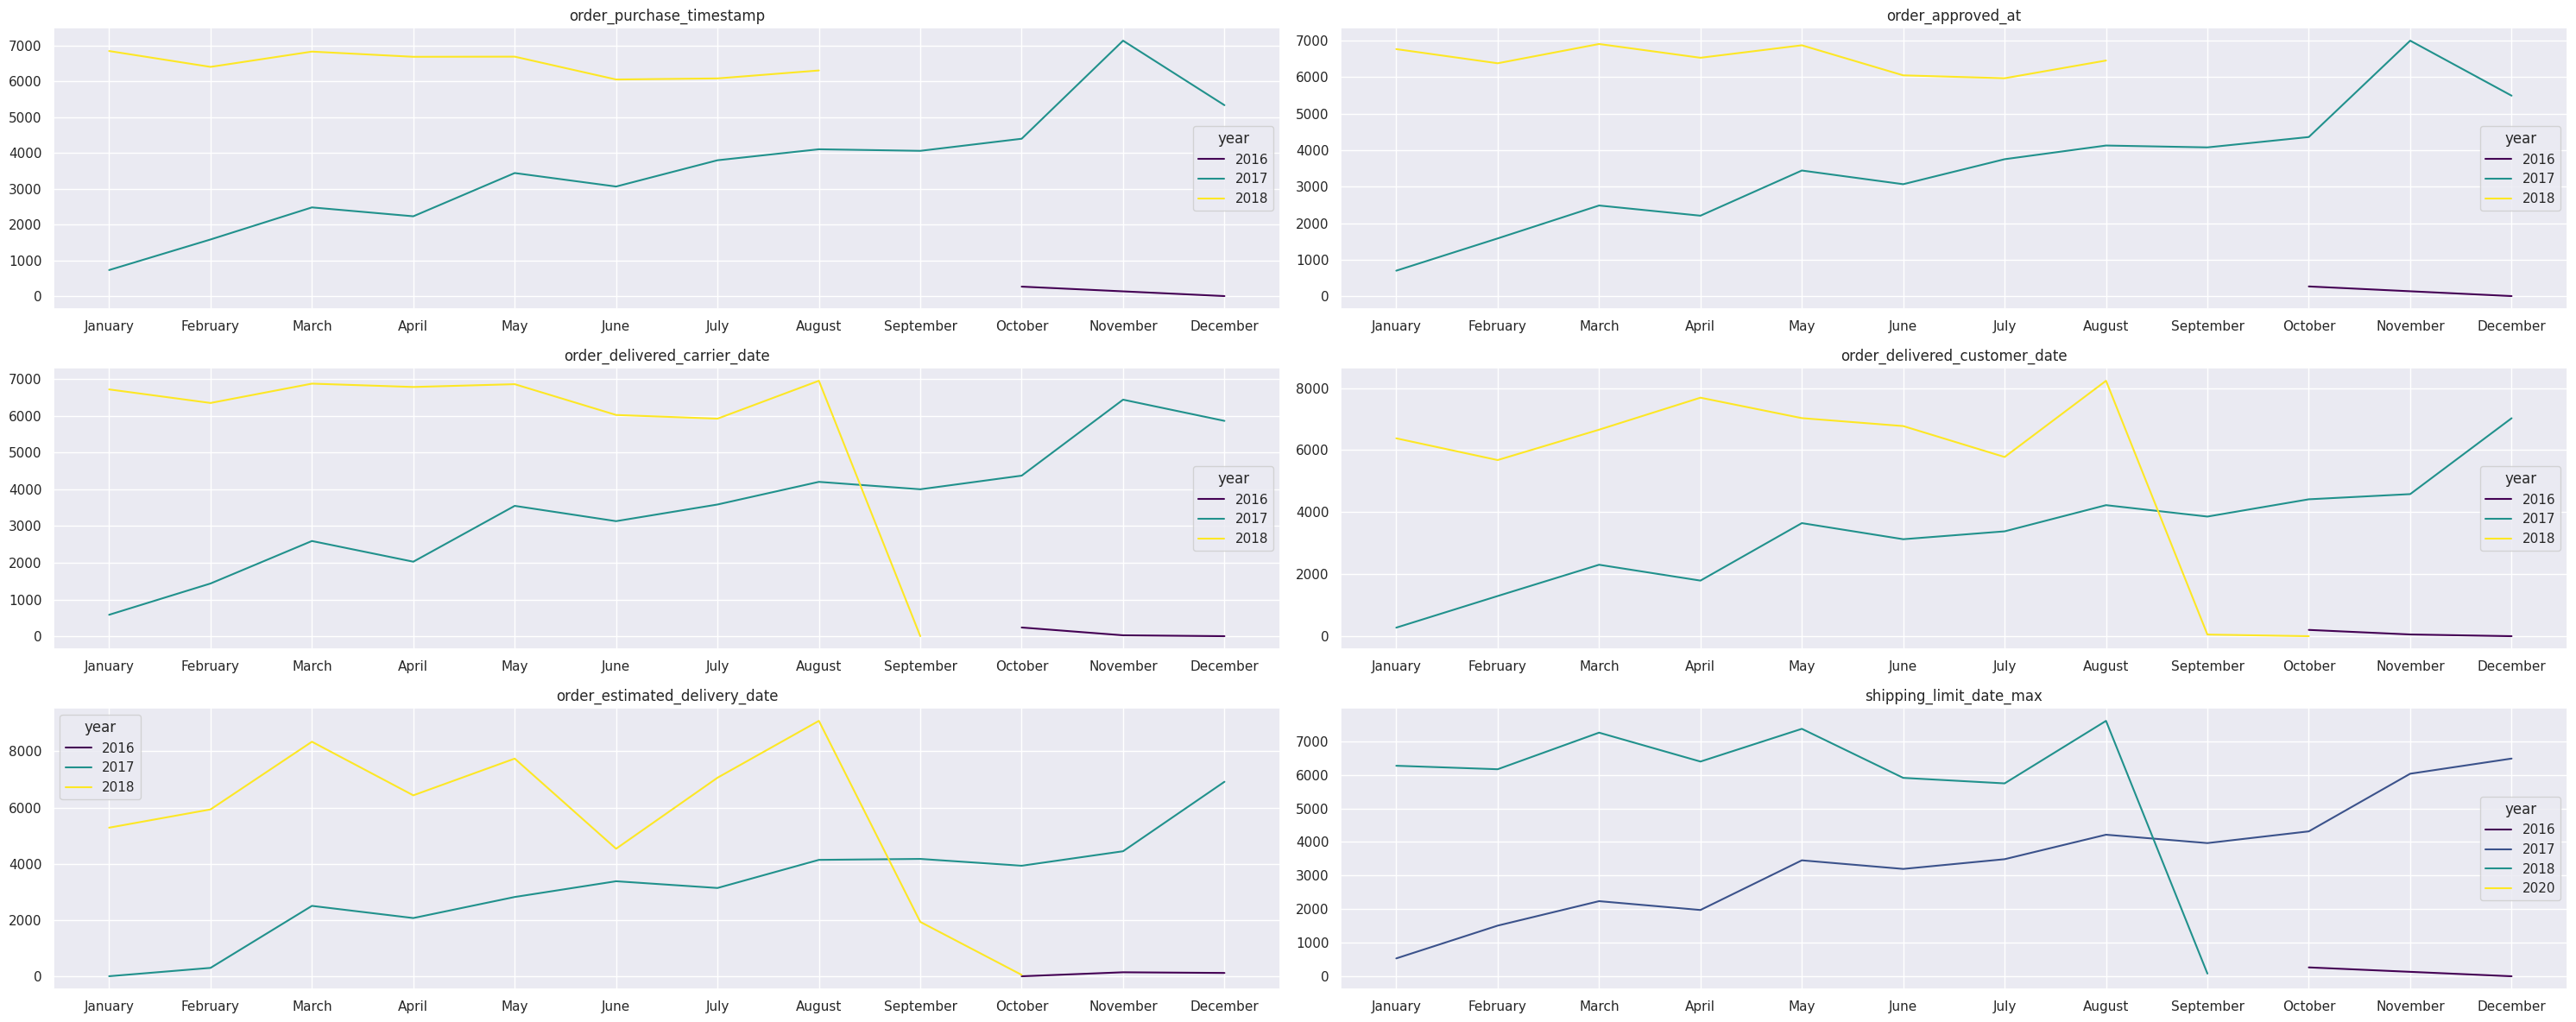

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(30,12))
axs = axs.ravel()

for i, column in enumerate(date_vars):
  data = df[column]
  day = df[column].dt.day
  month = df[column].dt.month
  month_name = df[column].dt.month_name()
  year = df[column].dt.year

  data_df = pd.concat([ data, day, month, month_name,  year ], axis=1)
  data_df.columns = ['data', 'day', 'month', 'month_name',  'year']

  data_df.set_index('data', drop=True, inplace=True)

  data_df_grouped = data_df.groupby(['year', 'month', 'month_name']).count()
  data_df_grouped.sort_values(by='month', inplace=True)

  sns.lineplot(data=data_df_grouped, x='month_name', y='day', hue='year', palette='viridis', ax=axs[i])
  axs[i].set(ylabel='', xlabel='', title=column)

plt.tight_layout()

In [ ]:
def map_plot(column):
  hour = df[column].dt.strftime('%H')
  week = df[column].dt.strftime('%w')

  map_time = pd.crosstab(week, hour)
  plt.figure(figsize=(20,4))
  sns.heatmap(map_time, cmap='viridis', vmin=0)

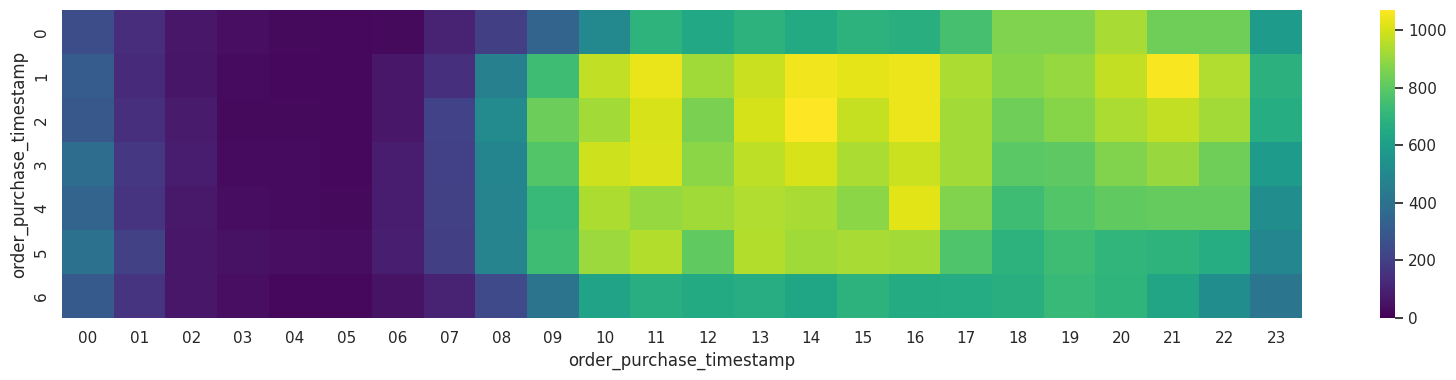

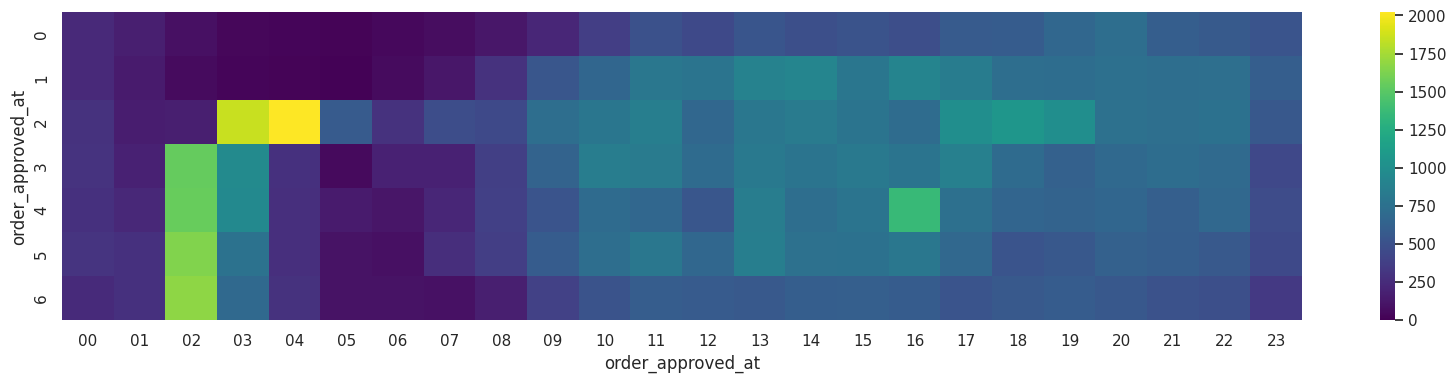

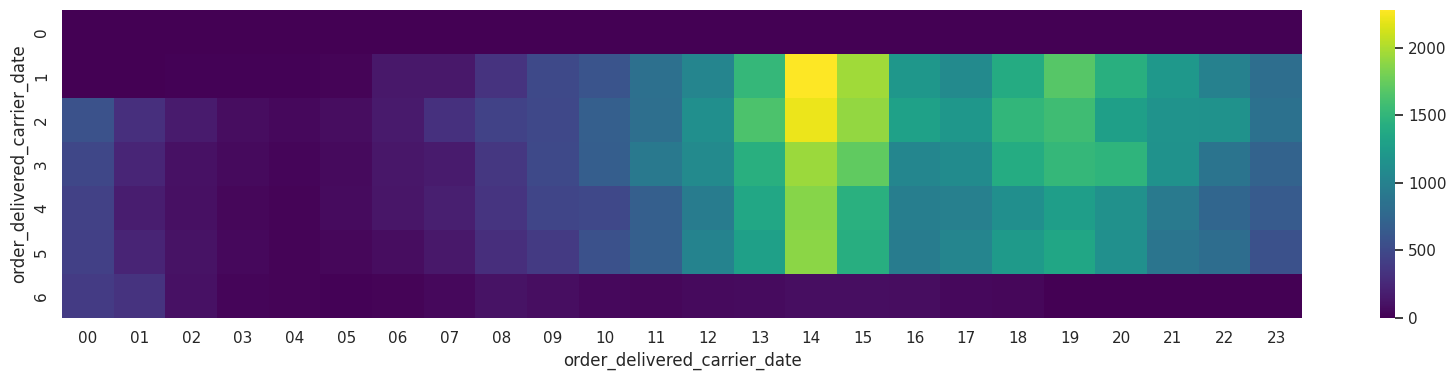

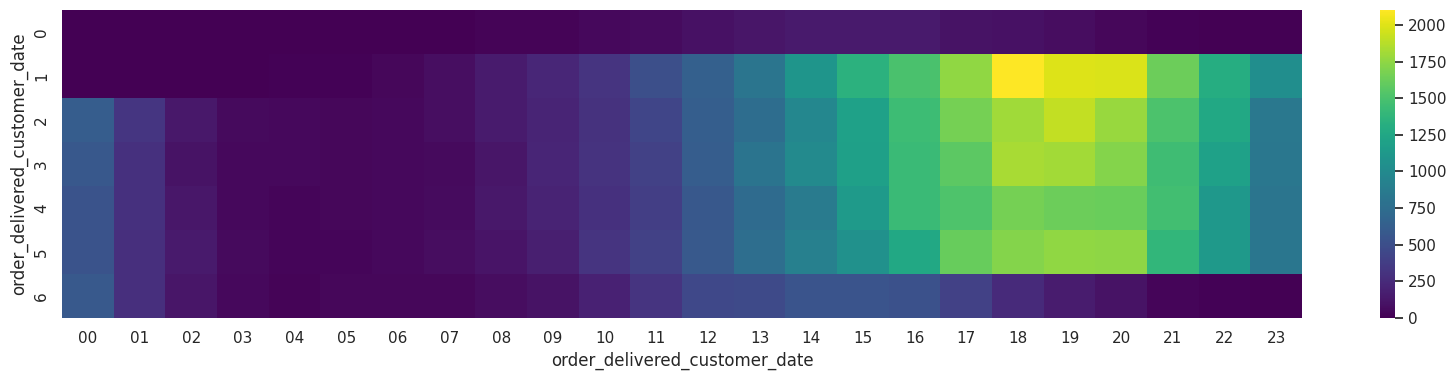

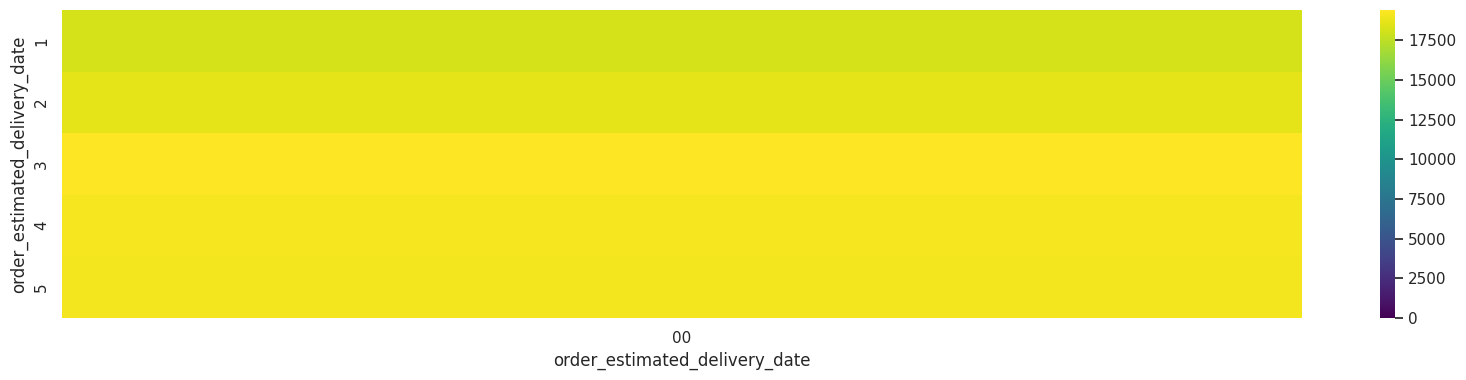

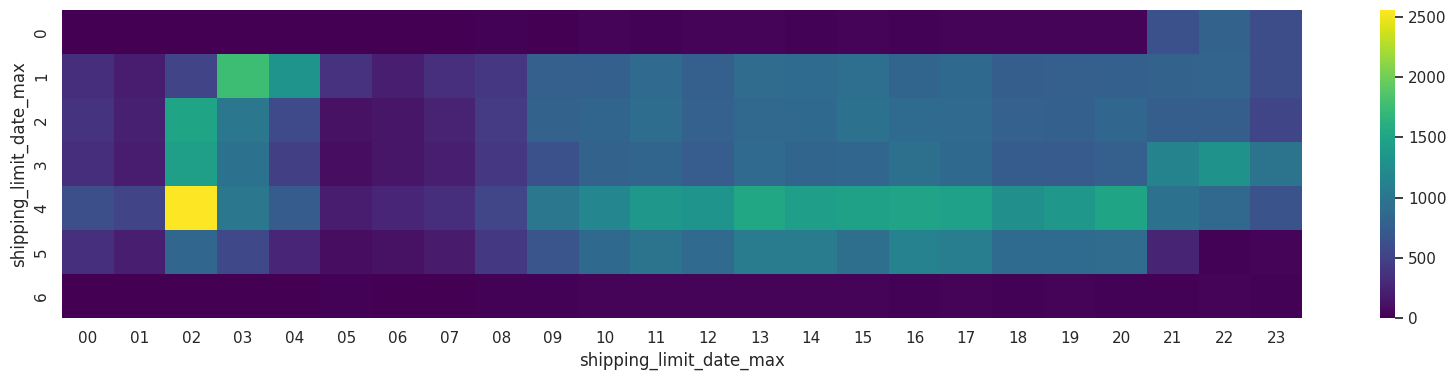

In [ ]:
for column in date_vars:
  map_plot(column)

In [ ]:
for column in date_vars:
  df[column + '_hour'] = df[column].dt.strftime('%H').astype('int64')
  df[column + '_day'] = df[column].dt.strftime('%d').astype('int64')
  df[column + '_month'] = df[column].dt.strftime('%m').astype('int64')
  df[column + '_week'] = df[column].dt.strftime('%w').astype('int64')
  df[column + '_year'] = df[column].dt.strftime('%Y').astype('int64')

In [ ]:
year_columns = [i for i in df.columns if '_year' in i]

for col in year_columns: 
  years = list(df[col].unique())
  years.sort()
  dict_year = {year: i for i, year in enumerate(years)}
  df[col] = df[col].apply(lambda x: dict_year[x])

In [ ]:
df[year_columns].head()

,order_purchase_timestamp_year,order_approved_at_year,order_delivered_carrier_date_year,order_delivered_customer_date_year,order_estimated_delivery_date_year,shipping_limit_date_max_year
0,1,1,1,1,1,1
1,2,2,2,2,2,2
2,2,2,2,2,2,2
3,1,1,1,1,1,1
4,2,2,2,2,2,2


##### Creating Features
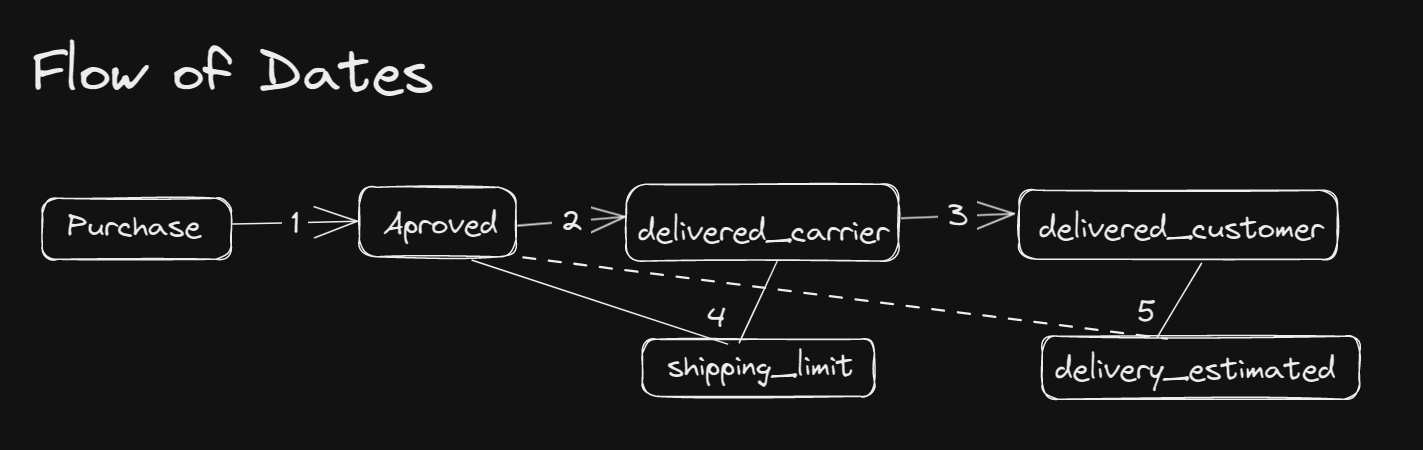

In [ ]:
!pip install workalendar
from workalendar.america.brazil import Brazil
cal = Brazil()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def working_days(date1, date2):
  if date1 < date2:
    return (cal.get_working_days_delta( date1, date2)) *(-1)
  else:
    return cal.get_working_days_delta( date1, date2)

def diff_dates(column1, column2):
  return df.apply(lambda row: working_days( row[column1], row[column2] ) , axis=1)

In [ ]:
def see_distribution(column):
  fig, (ax1,ax2) = plt.subplots(2,2, figsize=(30,8))
  
  sns.histplot(data=df,x=column, stat='percent', discrete=True, ax=ax1[0])
  sns.boxplot(data=df, x=column, ax=ax1[1])

  sns.histplot(data=df,x=column, hue='score', stat='percent', discrete=True, ax=ax2[0])
  sns.boxplot(data=df,y='score', x=column,orient='h', ax=ax2[1])

  plt.plot()

  return df.groupby('score')[column].describe()

In [ ]:
df['purchase_to_approved'] = diff_dates('order_approved_at', 'order_purchase_timestamp')
df['approved_to_carrier'] = diff_dates('order_delivered_carrier_date', 'order_approved_at')
df['carrier_to_customer'] = diff_dates('order_delivered_customer_date', 'order_delivered_carrier_date')
df['estimated_to_customer'] = diff_dates('order_delivered_customer_date', 'order_estimated_delivery_date')
df['limit_to_carrier'] = diff_dates('order_delivered_carrier_date', 'shipping_limit_date_max')

days_features = ['purchase_to_approved', 'approved_to_carrier', 'carrier_to_customer', 'estimated_to_customer', 'limit_to_carrier']

##### Distribution

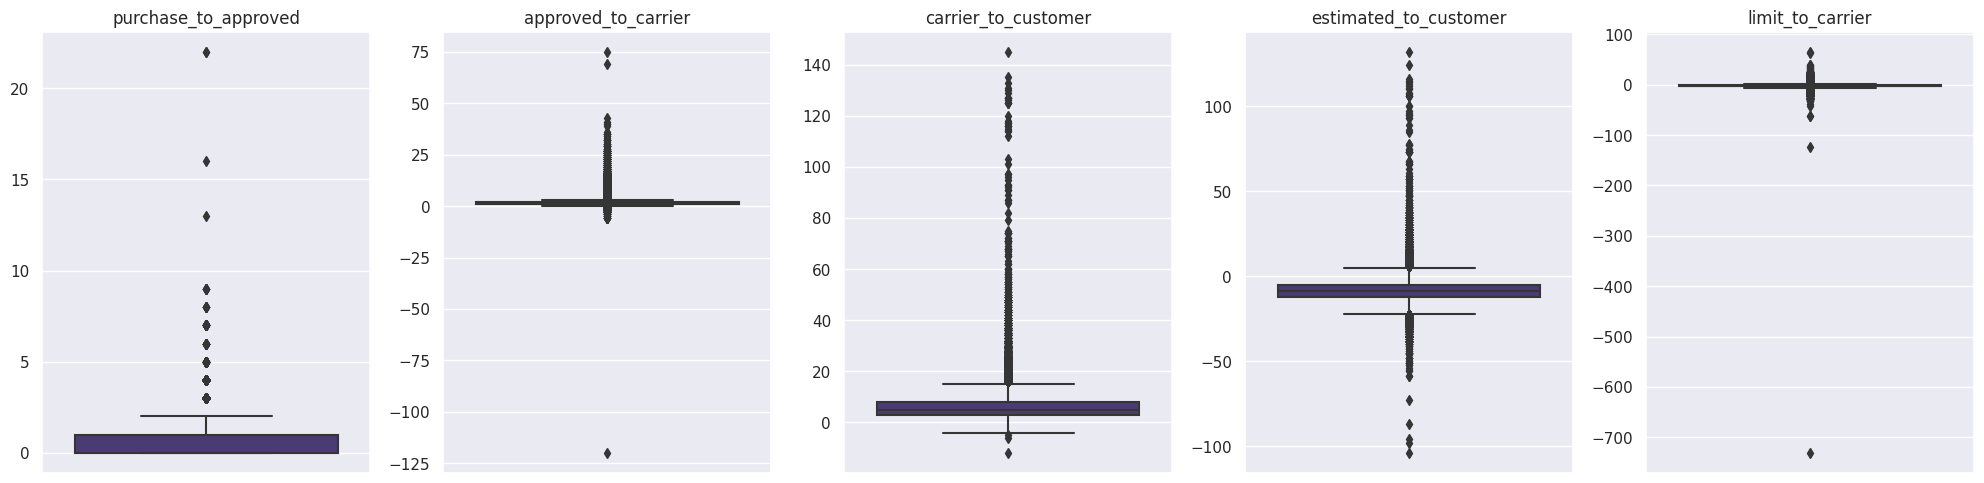

In [ ]:
fig, axs = plt.subplots(ncols=5, figsize=(20,5))
axs = axs.ravel()

for i, col in enumerate(days_features):
  sns.boxplot(data=df, 
               y=col,
               ax=axs[i])
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

# Bivariate

In [ ]:
df.dtypes

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
                                      ...      
purchase_to_approved                      int64
approved_to_carrier                       int64
carrier_to_customer                       int64
estimated_to_customer                     int64
limit_to_carrier                          int64
Length: 74, dtype: object

In [ ]:
#sns.pairplot(df[continuous_vars])

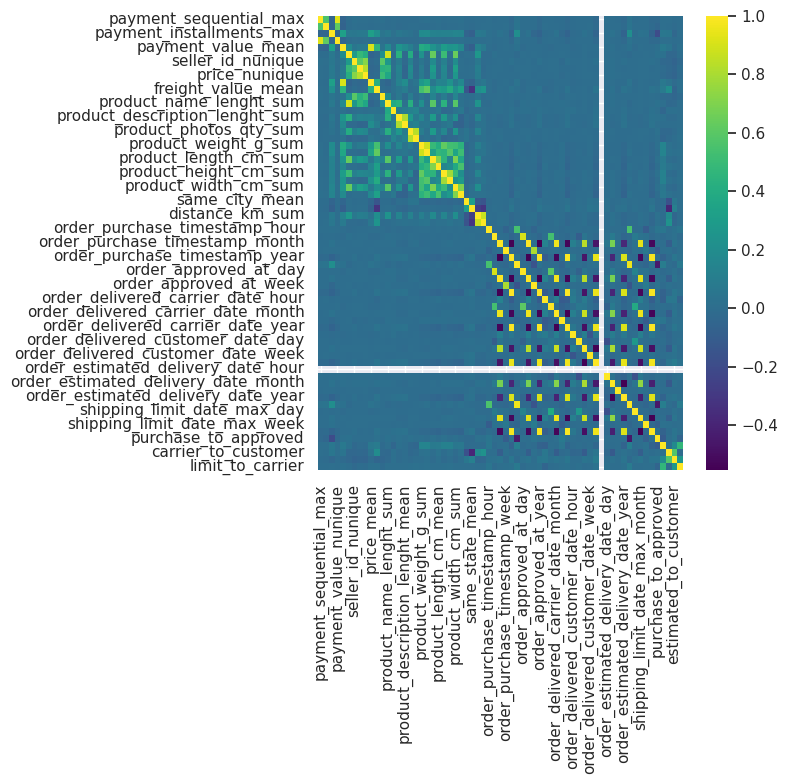

In [ ]:
corr = df.drop('score', axis=1).corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='viridis')
plt.tight_layout()

In [ ]:
high_corr_vars = {}
for i in range(len(corr.columns)):
    for j in range(i):
      var_value = abs(corr.iloc[i, j])
      if var_value > 0.8:
          var_name = corr.columns[i]
          if var_name not in high_corr_vars:
              high_corr_vars[var_name] = var_value

print("Variables with high correlation (absolute value > 0.8): ", len(high_corr_vars))
print('---' * 30)
pd.Series(high_corr_vars).sort_values(ascending=False).to_frame()

Variables with high correlation (absolute value > 0.8):  21
------------------------------------------------------------------------------------------


,0
order_approved_at_year,0.998873
order_approved_at_month,0.995882
order_delivered_carrier_date_year,0.988077
shipping_limit_date_max_year,0.980884
order_delivered_carrier_date_month,0.960380
shipping_limit_date_max_hour,0.958746
order_delivered_customer_date_year,0.950978
shipping_limit_date_max_month,0.934111
payment_value_nunique,0.921922
price_mean,0.910578


In [ ]:
corr_target = df.corr(numeric_only=True)['score'].drop('score', axis=0)
corr_target.sort_values(ascending=False).to_frame()

,score
same_state_mean,0.063730
order_delivered_customer_date_month,0.045905
order_estimated_delivery_date_month,0.039875
order_purchase_timestamp_month,0.031379
order_approved_at_month,0.031116
...,...
order_item_id_nunique,-0.122897
approved_to_carrier,-0.154548
estimated_to_customer,-0.265825
carrier_to_customer,-0.300365


# Data Prep

## Categorical Features

In [ ]:
#transform
pay_types = pd.get_dummies(df['payment_type_max'], prefix='pay_type_')
df = pd.concat([df, pay_types], axis=1)

In [ ]:
df['has_diff_payment'] = df.apply(lambda row: 1 if row['payment_type_min'] == row['payment_type_max'] else 0, axis=1)

In [ ]:
df = df.drop('payment_type_max', axis=1)

In [ ]:
df = df.drop('payment_type_min', axis=1)

<Axes: xlabel='count', ylabel='has_diff_payment'>

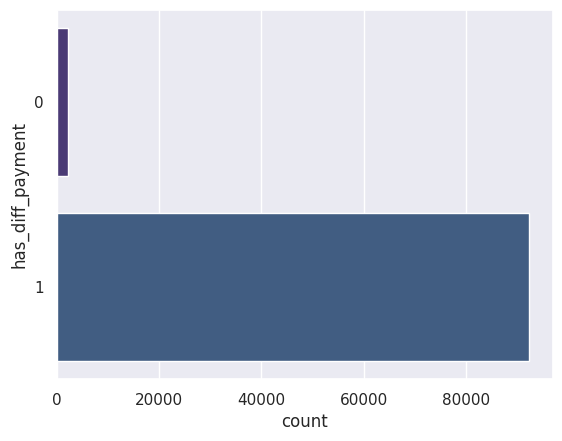

In [ ]:
sns.countplot(data=df, y='has_diff_payment')

## Skewed Features

In [ ]:
max_normalize = resume(df).set_index('column', drop=True).max_normalize
max_normalize[ max_normalize > 90 ]

column
order_estimated_delivery_date_hour    100.0
has_diff_payment                      97.74
pay_type__debit_card                  98.46
payment_type_nunique                  97.74
pay_type__voucher                      96.2
product_category_name_nunique         99.24
seller_id_nunique                     98.67
price_nunique                         97.52
product_id_nunique                    96.66
same_city_mean                        94.84
payment_value_nunique                 97.04
order_item_id_nunique                 90.02
payment_sequential_max                96.95
Name: max_normalize, dtype: object

In [ ]:
drop_cols = max_normalize[ max_normalize > 90 ].index
df = df.drop(drop_cols, axis=1)

In [ ]:
df = df.drop(date_vars, axis=1)

## High Correlation

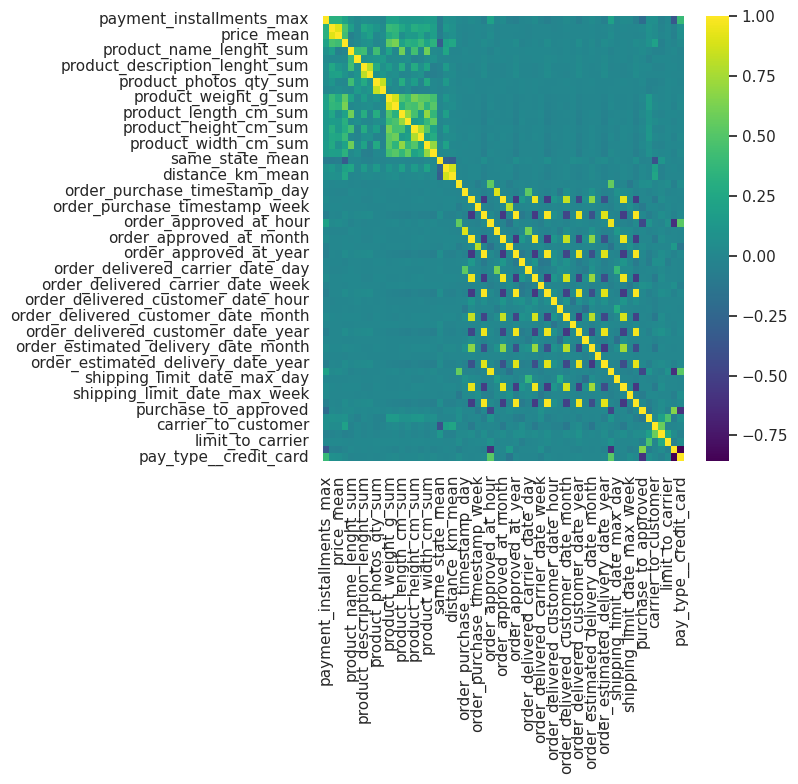

In [ ]:
corr = df.drop('score', axis=1).corr(numeric_only=True)

plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='viridis')
plt.tight_layout()

In [ ]:
high_corr_vars = {}
for i in range(len(corr.columns)):
    for j in range(i):
      var_value = abs(corr.iloc[i, j])
      if var_value > 0.8:
          var_name = corr.columns[i]
          if var_name not in high_corr_vars:
              high_corr_vars[var_name] = var_value

print("Variables with high correlation (absolute value > 0.8): ", len(high_corr_vars))
print('---' * 30)
pd.Series(high_corr_vars).sort_values(ascending=False).to_frame()

Variables with high correlation (absolute value > 0.8):  19
------------------------------------------------------------------------------------------


,0
order_approved_at_year,0.998873
order_approved_at_month,0.995882
order_delivered_carrier_date_year,0.988077
shipping_limit_date_max_year,0.980884
order_delivered_carrier_date_month,0.960380
shipping_limit_date_max_hour,0.958746
order_delivered_customer_date_year,0.950978
shipping_limit_date_max_month,0.934111
price_mean,0.910578
order_estimated_delivery_date_year,0.909120


In [ ]:
df = df.drop(high_corr_vars.keys(), axis=1)

In [ ]:
# Group features
df['same_state_mean'] = df['same_state_mean'].apply(lambda x: 1 if x > 1 else 0)
df['payment_installments_max'] = df['payment_installments_max'].apply(lambda x: 1 if x > 1 else 0)
df['purchase_to_approved'] = df['purchase_to_approved'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
resume_df = resume(df).reset_index(drop=True)
resume_df

,column,dtype,count,max_normalize,values,normalize
0,same_state_mean,int64,1,100.0,[0],[100.0]
1,payment_installments_max,int64,2,51.48,"[0, 1]","[51.48, 48.52]"
2,purchase_to_approved,int64,2,88.96,"[0, 1]","[88.96, 11.04]"
3,pay_type__boleto,uint8,2,80.11,"[0, 1]","[80.11, 19.89]"
4,order_purchase_timestamp_year,int64,3,54.91,"[1, 2, 0]","[54.91, 44.8, 0.28]"
5,order_estimated_delivery_date_week,int64,5,20.55,"[3, 1, 2, 5, 4]","[20.55, 20.31, 20.17, 19.73, 19.25]"
6,shipping_limit_date_max_week,int64,7,27.06,"[5, 1, 4, 3, 2, 0, 6]","[27.06, 18.55, 18.26, 17.81, 15.49, 2.45, 0.39]"
7,order_delivered_customer_date_week,int64,7,19.61,"[2, 5, 6, 3, 4, 1, 0]","[19.61, 19.19, 18.68, 17.9, 17.72, 5.65, 1.24]"
8,order_delivered_carrier_date_week,int64,7,22.31,"[3, 4, 2, 1, 5, 6, 0]","[22.31, 20.36, 20.32, 17.59, 17.56, 1.82, 0.04]"
9,order_purchase_timestamp_week,int64,7,16.27,"[1, 2, 3, 6, 0, 4, 5]","[16.27, 16.08, 15.61, 14.86, 14.2, 12.07, 10.91]"


In [ ]:
continuous_vars = list(resume_df[20:].column)
len(continuous_vars) # Standand scaler vars

18

## Outliers

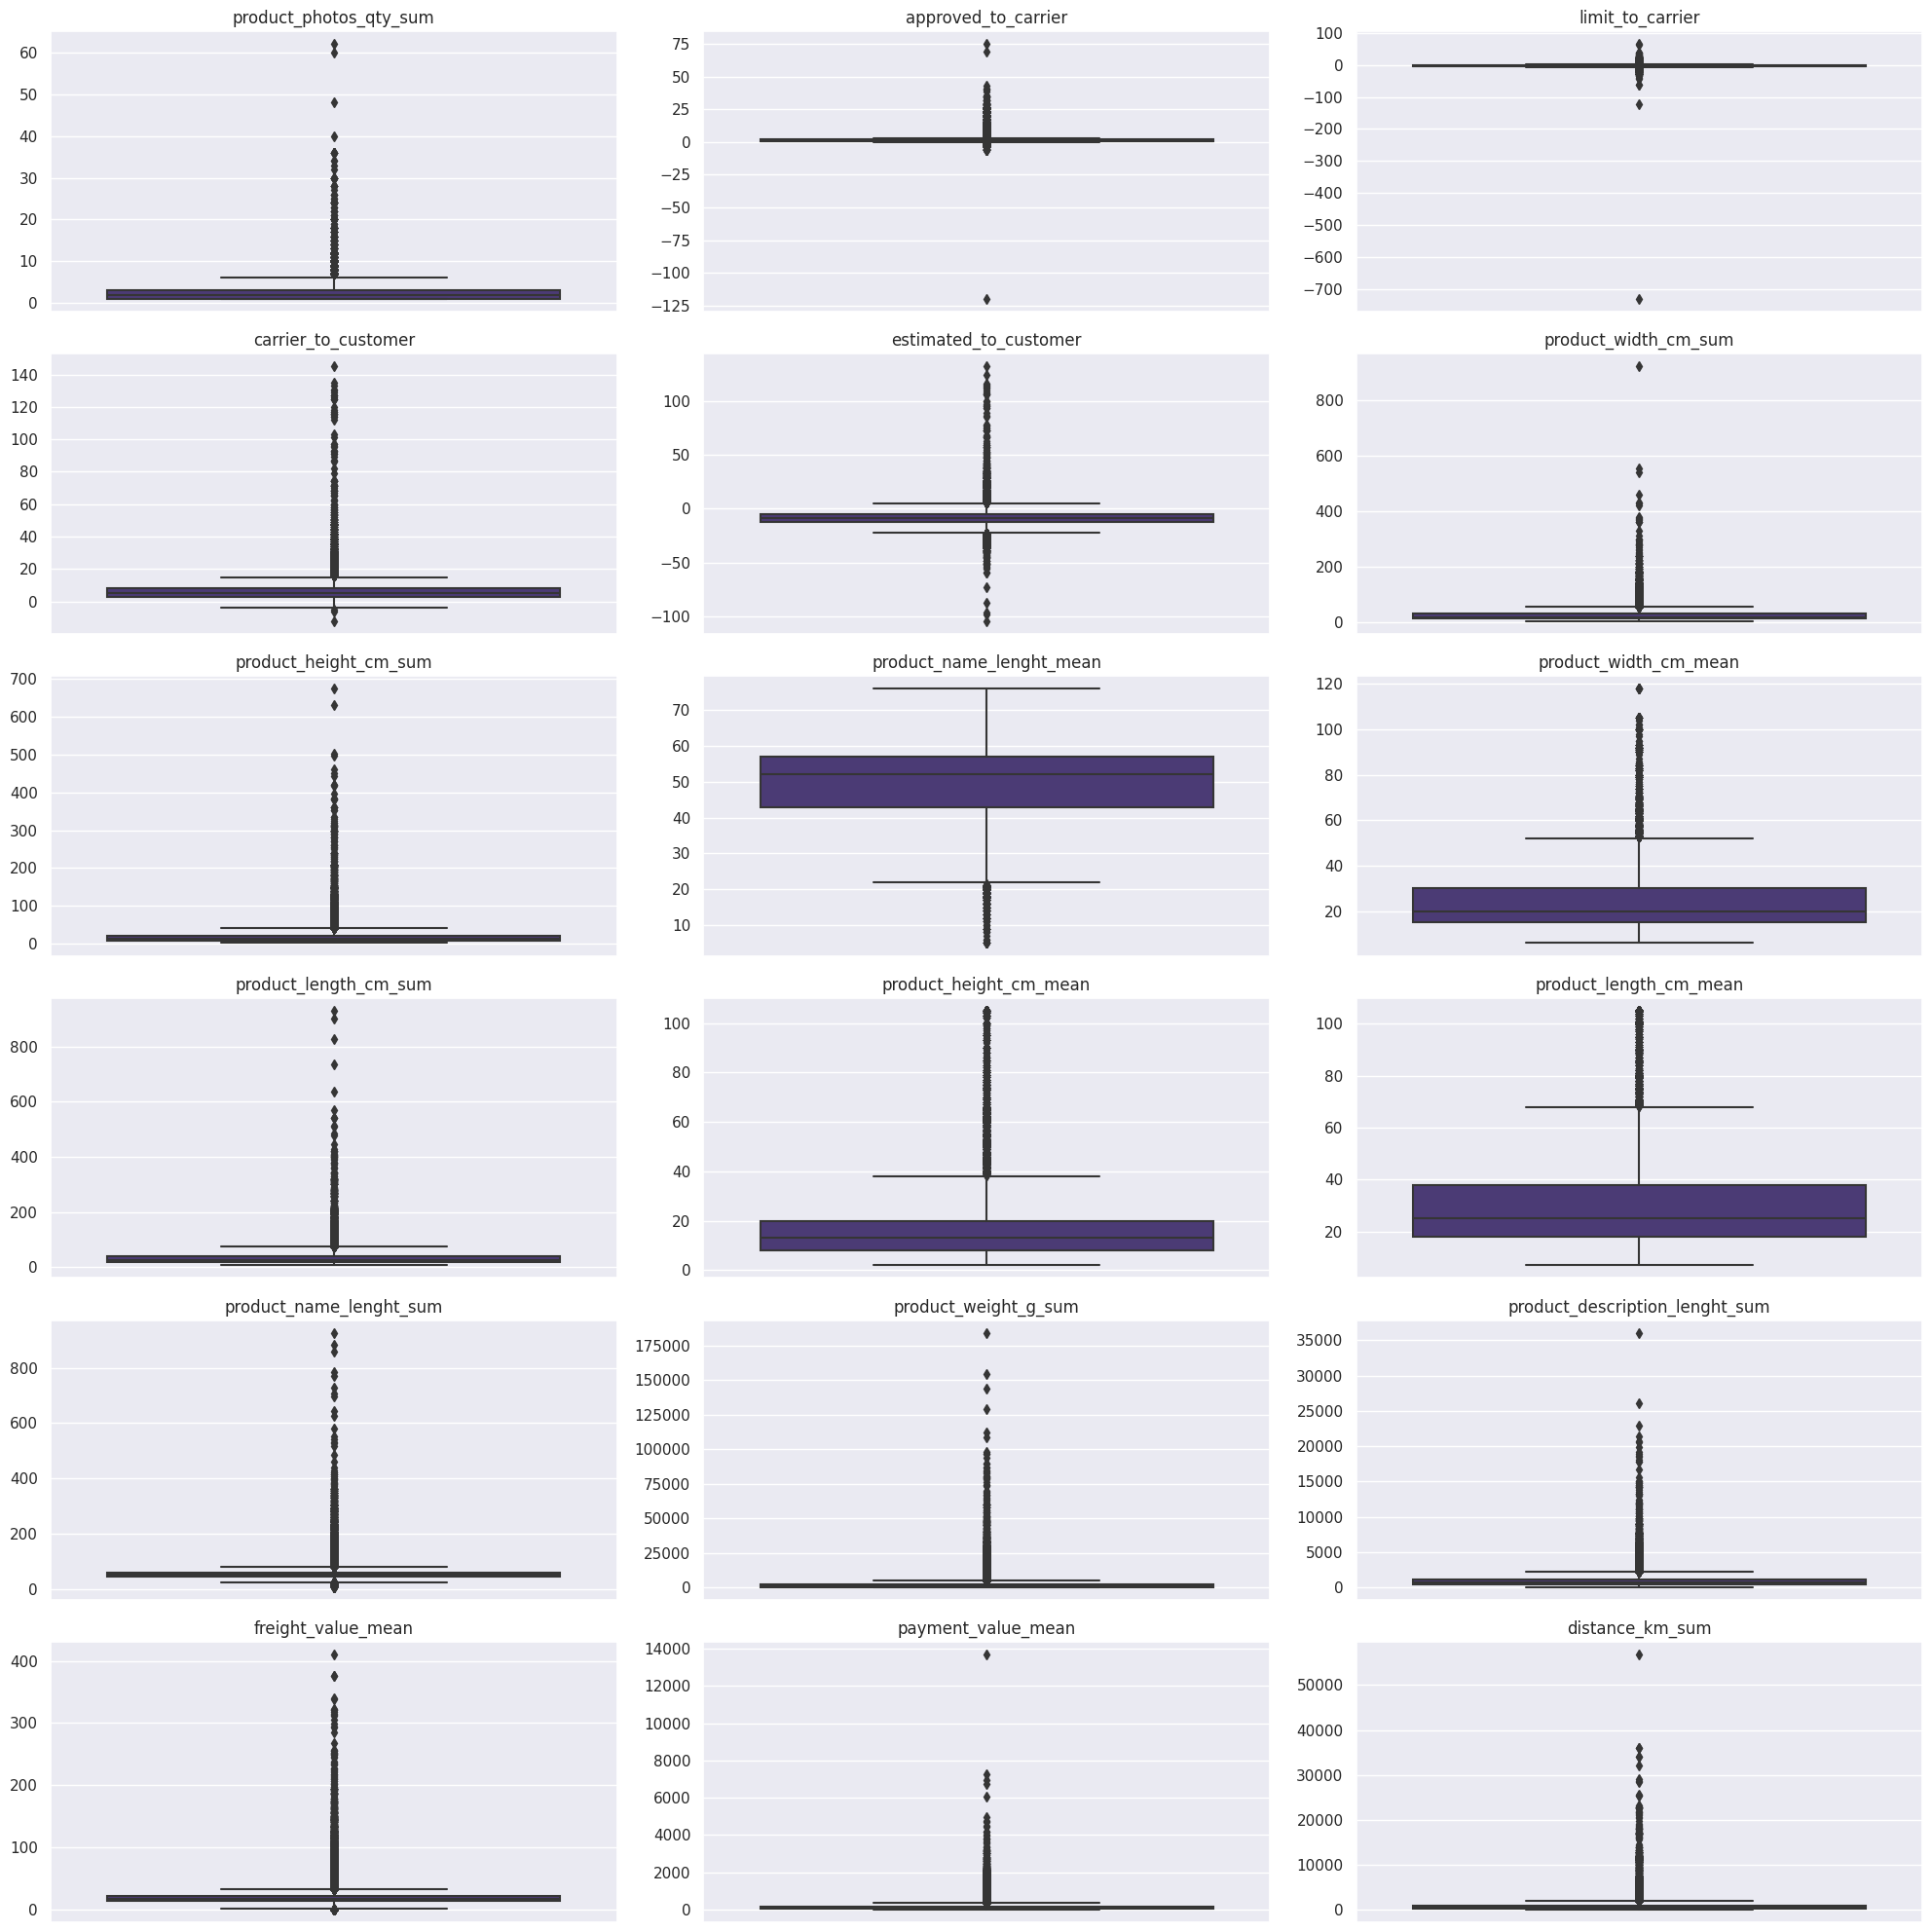

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(20,20))
axs = axs.ravel()

for i, col in enumerate(continuous_vars):
  sns.boxplot(
      data=df,
      y=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

In [ ]:
df_outliers = df.copy()

df_outliers = df_outliers[ df_outliers['product_photos_qty_sum'] < 40 ]
df_outliers = df_outliers[ (df_outliers['approved_to_carrier'] > -100) & (df_outliers['approved_to_carrier'] < 50)  ]
df_outliers = df_outliers[ df_outliers['limit_to_carrier'] > -100 ]
df_outliers = df_outliers[ (df_outliers['estimated_to_customer'] > -65) & (df_outliers['estimated_to_customer'] < 125 )]
df_outliers = df_outliers[ df_outliers['limit_to_carrier'] > -100 ]
df_outliers = df_outliers[ df_outliers['product_width_cm_sum'] < 500]
df_outliers = df_outliers[ df_outliers['product_height_cm_sum'] < 600]
df_outliers = df_outliers[ df_outliers['product_length_cm_sum'] < 700]
df_outliers = df_outliers[ df_outliers['product_description_lenght_sum'] < 25000]
df_outliers = df_outliers[ df_outliers['payment_value_mean'] < 8000]
df_outliers = df_outliers[ df_outliers['distance_km_sum'] < 30000]

print('Removed: ', df.shape[0] - df_outliers.shape[0])

Removed:  27


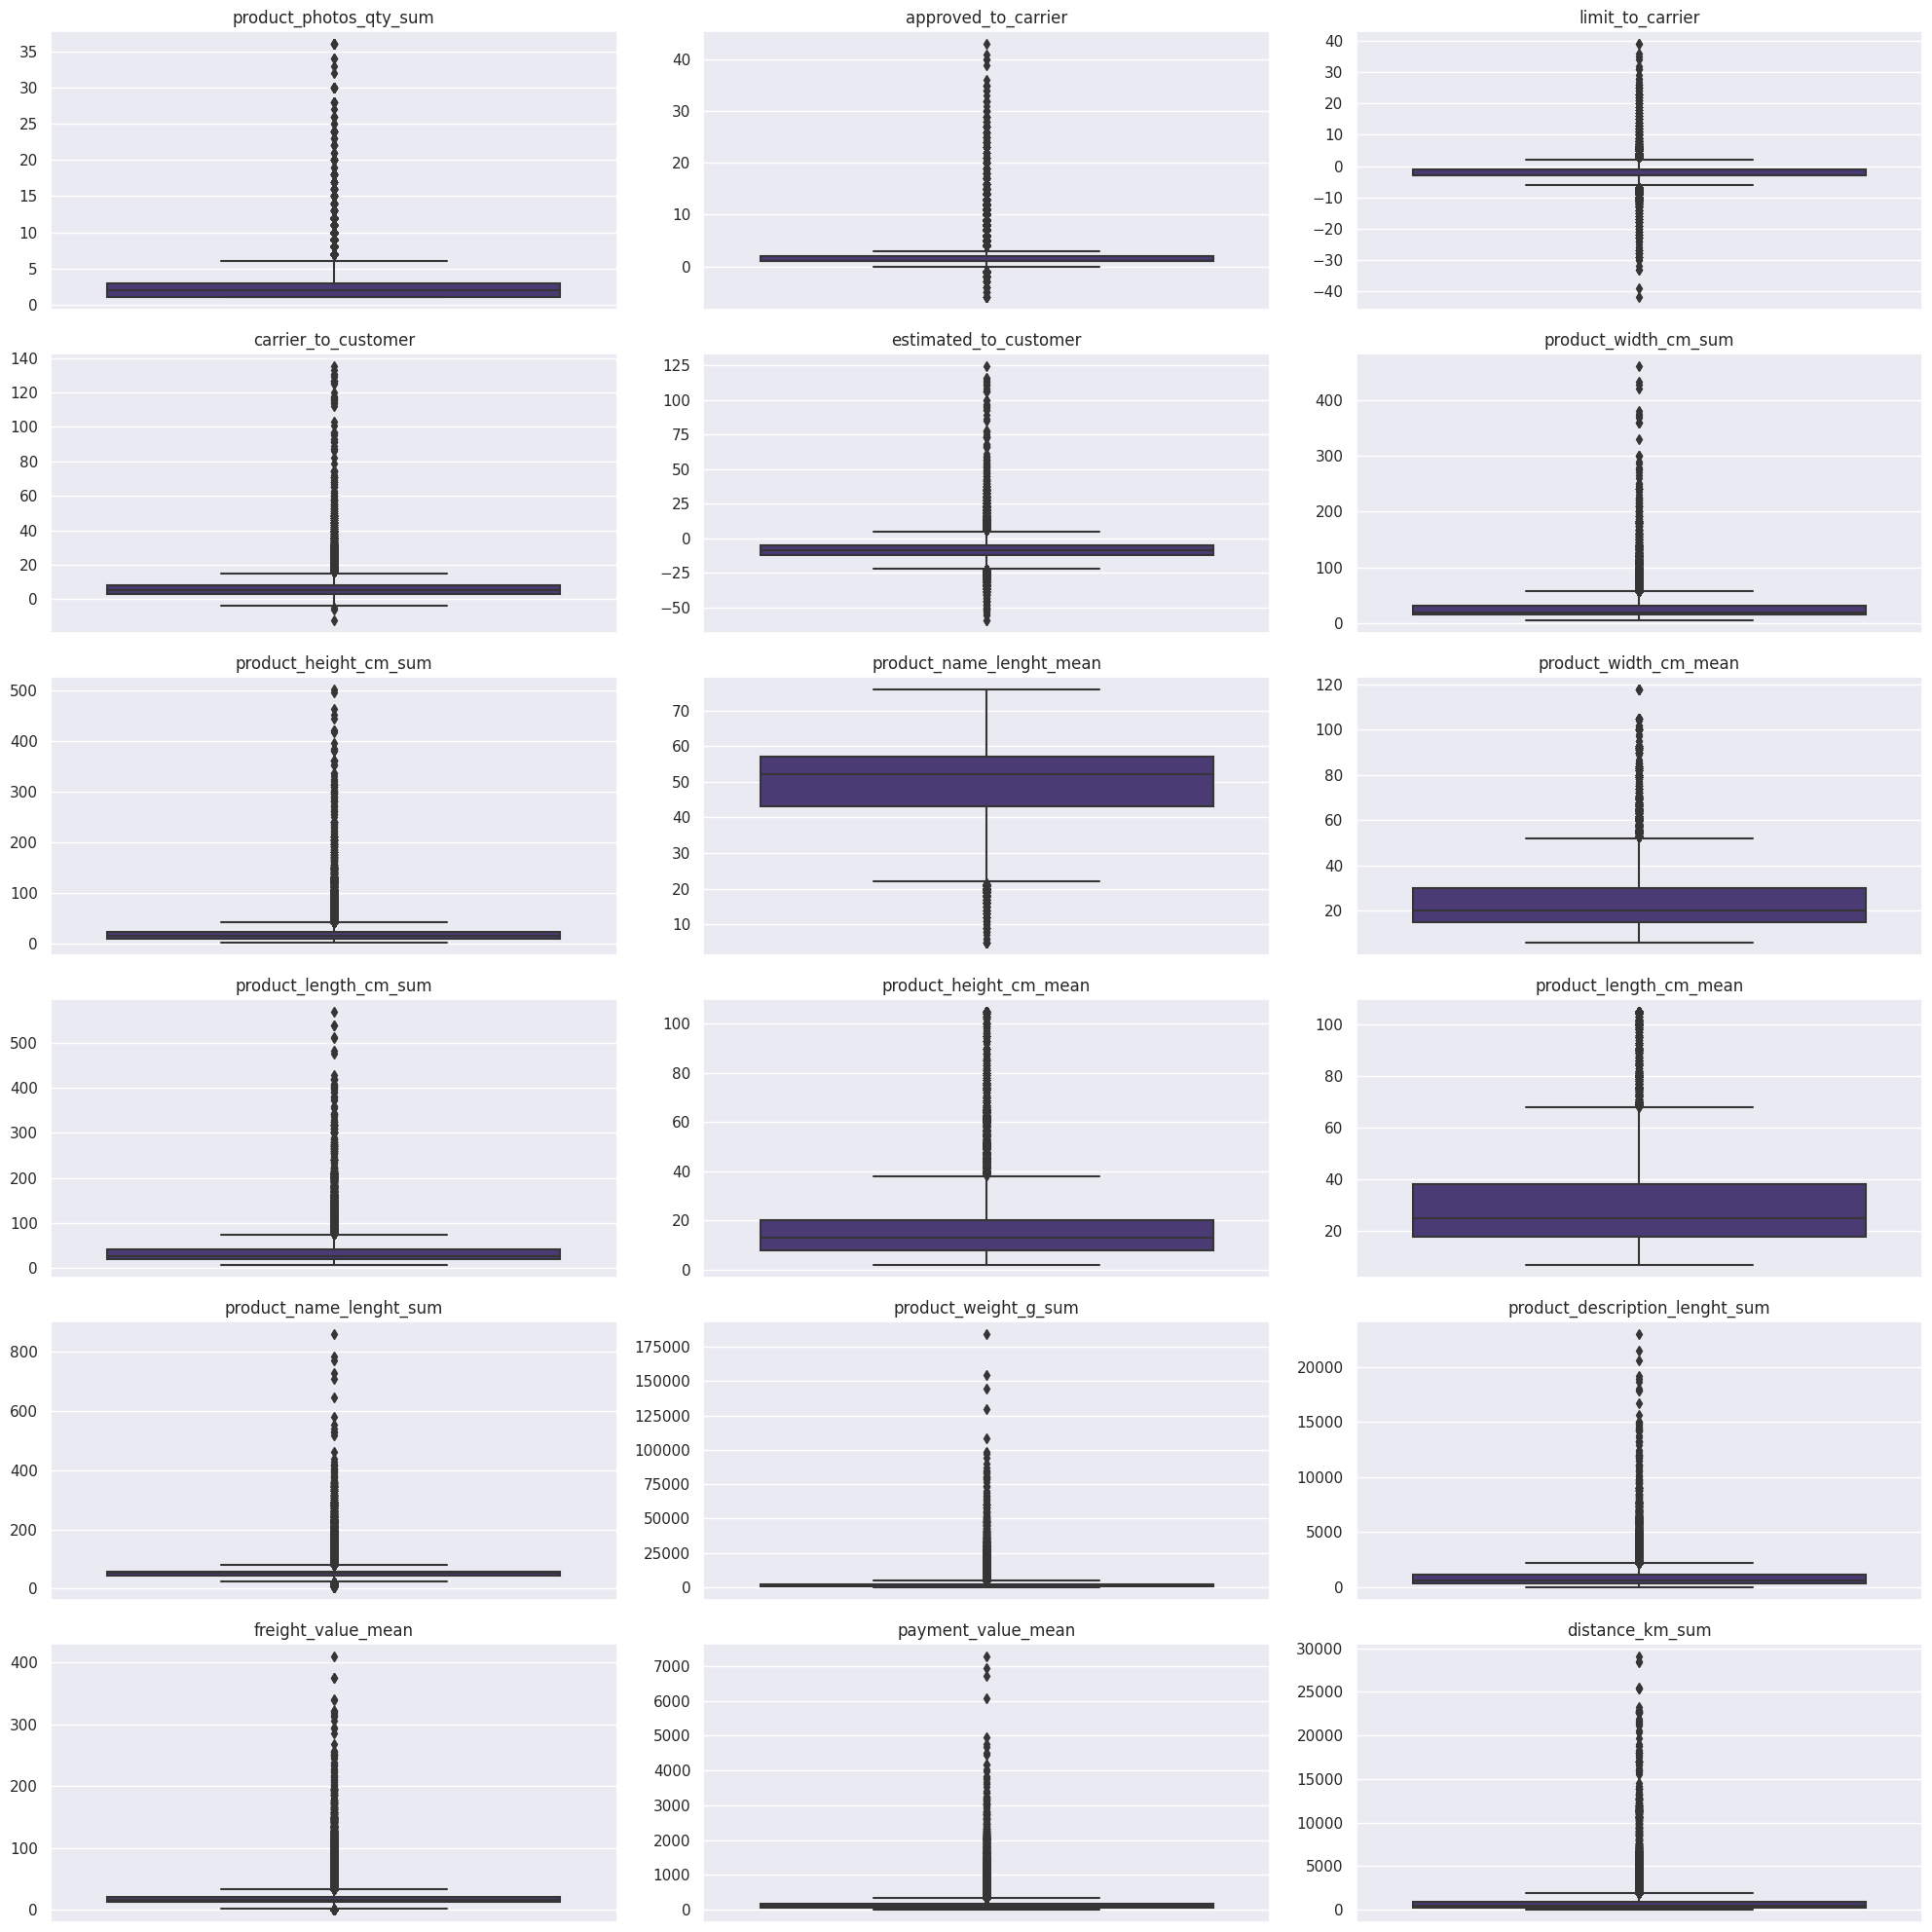

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(20,20))
axs = axs.ravel()

for i, col in enumerate(continuous_vars):
  sns.boxplot(
      data=df_outliers,
      y=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

In [ ]:
def remove_outliers_zscore(df, columns, threshold=4):
    df_no_outliers = df.copy()

    for column in columns:
        z_scores = np.abs((df_no_outliers[column] - df_no_outliers[column].mean()) / df_no_outliers[column].std())
        df_no_outliers = df_no_outliers[z_scores <= threshold]

    print('Removed: ', df.shape[0] - df_no_outliers.shape[0])
    return df_no_outliers

In [ ]:
df_no_outliers = remove_outliers_zscore(df_outliers, continuous_vars)

Removed:  13502


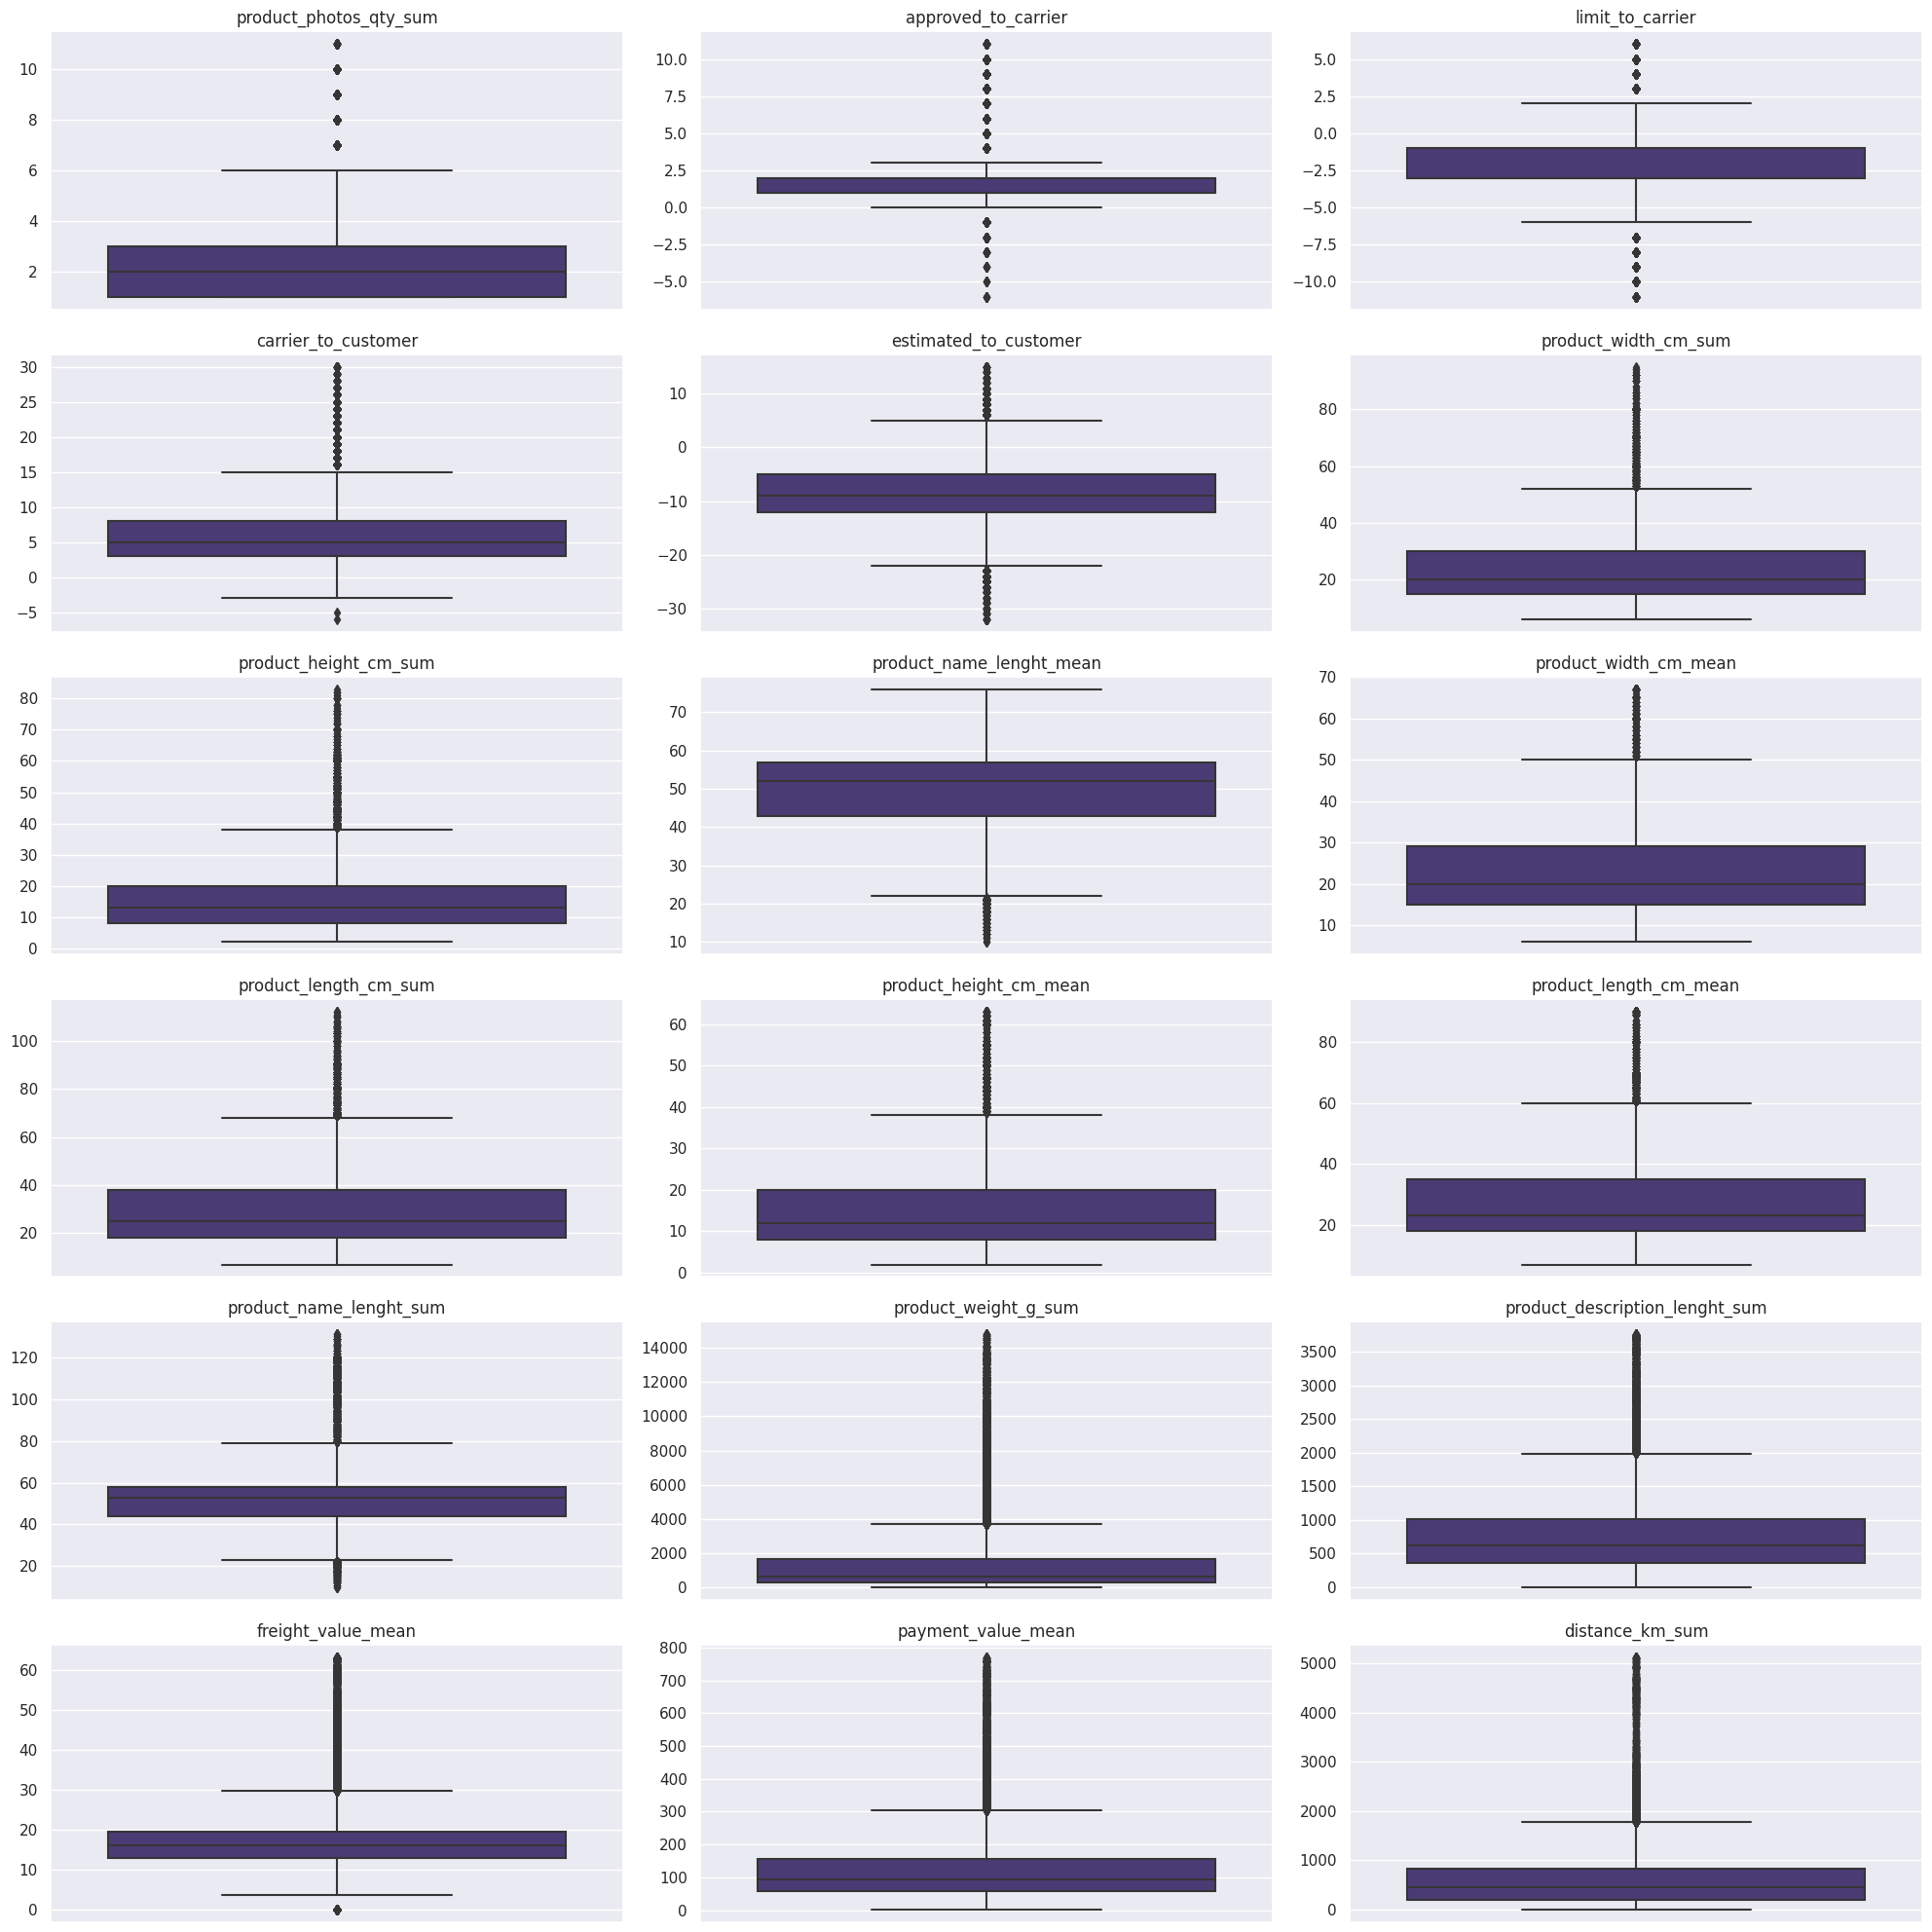

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(20,20))
axs = axs.ravel()

for i, col in enumerate(continuous_vars):
  sns.boxplot(
      data=df_no_outliers,
      y=col,
      ax=axs[i]
  )
  axs[i].set(ylabel='', title=col)

plt.tight_layout()

In [ ]:
all_out = df.score.value_counts().sort_index()
view_out = df_outliers.score.value_counts().sort_index()
zscore_out =df_no_outliers.score.value_counts().sort_index() 

norm_all_out = round(df.score.value_counts(normalize=True).sort_index() * 100, 2)
norm_view_out = round(df_outliers.score.value_counts(normalize=True).sort_index() * 100, 2)
norm_zscore_out = round(df_no_outliers.score.value_counts(normalize=True).sort_index() * 100, 2)

target_format = pd.concat([ all_out, view_out, zscore_out, norm_all_out, norm_view_out, norm_zscore_out ] , axis=1)

target_format.columns = ['all', 'view', 'zscore', 'norm_all', 'norm_view', 'norm_zscore']
target_format

,all,view,zscore,norm_all,norm_view,norm_zscore
1.0,9145,9136,6649,9.68,9.67,8.21
2.0,2870,2868,2292,3.04,3.04,2.83
3.0,7816,7814,6638,8.27,8.27,8.20
4.0,18612,18609,16249,19.70,19.70,20.07
5.0,56047,56036,49133,59.32,59.32,60.69


Text(0.5, 1.0, 'Target')

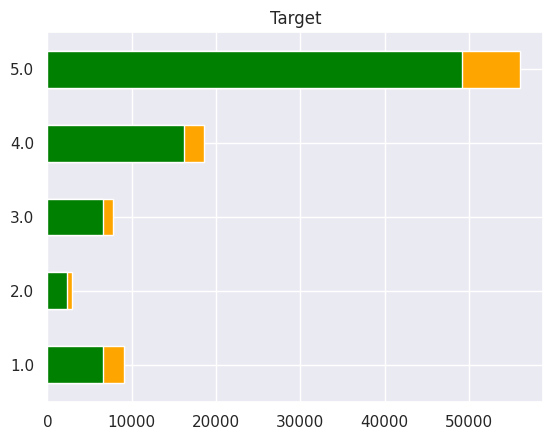

In [ ]:
all_out.plot(kind='barh', color='red')
view_out.plot(kind='barh', color='orange')
zscore_out.sort_index().plot(kind='barh', color='green')

plt.title('Target')

In [ ]:
df = df_no_outliers.copy()

# Bivariate Outiliers

In [ ]:
#sns.pairplot(df[continuous_vars])

In [ ]:
from sklearn.ensemble import IsolationForest

def remove_outliers_iforest(df, columns, contamination):
    df_no_outliers = df.copy()
    clf = IsolationForest(contamination=contamination)

    X = df_no_outliers[columns]
    clf.fit(X)
    outliers = clf.predict(X) == 1

    df_no_outliers = df_no_outliers[outliers]

    print('Removed: ', df.shape[0] - df_no_outliers.shape[0])
    return df_no_outliers


In [ ]:
df_no_outliers = remove_outliers_iforest(df, continuous_vars, contamination=0.05)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Removed:  4048


In [ ]:
all_out = df.score.value_counts().sort_index()
iforest_out = df_no_outliers.score.value_counts().sort_index() 

norm_all_out = round(df.score.value_counts(normalize=True).sort_index() * 100, 2)
norm_iforest_out = round(df_no_outliers.score.value_counts(normalize=True).sort_index() * 100, 2)

target_format = pd.concat([ all_out, iforest_out, norm_all_out, norm_iforest_out ] , axis=1)

target_format.columns = ['all', 'iforest', 'norm_all', 'norm_iforest']
target_format['diff'] = target_format['all'] - target_format['iforest']
target_format

,all,iforest,norm_all,norm_iforest,diff
1.0,6649,5925,8.21,7.70,724
2.0,2292,2123,2.83,2.76,169
3.0,6638,6237,8.20,8.11,401
4.0,16249,15491,20.07,20.14,758
5.0,49133,47137,60.69,61.29,1996


Text(0.5, 1.0, 'Target')

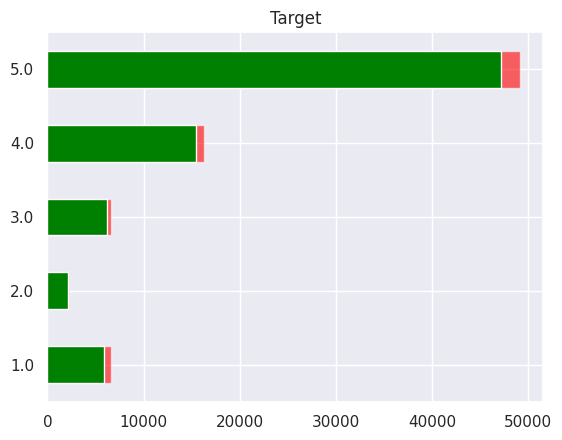

In [ ]:
all_out.plot(kind='barh', alpha=0.6, color='red')
iforest_out.plot(kind='barh', color='green')
plt.title('Target')

In [ ]:
#sns.pairplot(df_no_outliers[continuous_vars])

In [ ]:
df = df_no_outliers.copy()

# Exporting

In [ ]:
#path = f'/content/drive/MyDrive/Data Science/Projects/Olist/Output/Olist_model_V2.csv'
#df.to_csv(path, header=True)

[🤖 Modeling Order Satisfaction: Testing Algorithms](https://www.kaggle.com/code/gustavofelici/modeling-order-satisfaction-testing-algorithms)